<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/XAI_EMG_Stroke_SMOTE_TODAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"

!{CMD}
!pip install -r requirements.txt
!pip install tabgan
!pip install tensorflow"""

'CMD = "wget https://raw.githubusercontent.com/Diyago/"  "GAN-for-tabular-data/master/requirements.txt"\n\n!{CMD}\n!pip install -r requirements.txt\n!pip install tabgan\n!pip install tensorflow'

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
dataset=pd.read_excel("/content/drive/MyDrive/Iqram Sir/EMG_Stroke_1.xlsx")

#dataset=pd.read_excel("/content/drive/MyDrive/Publications/EMG Stroke/Data/EMG_Stroke_1.xlsx")

classes = np.array(sorted(list(set(dataset.iloc[:, 1]))))
result = {}

In [3]:
set(list(dataset['Status']))

{'Control', 'Stroke'}

In [4]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 0]=encoder.fit_transform(dataset.iloc[:, 1])

In [5]:
set(list(dataset['Status']))

{'Control', 'Stroke'}

In [6]:
X = dataset.iloc[:,2:]
y = dataset.iloc[:, 0]
col=list(dataset.iloc[0:0,2:])

In [7]:
X

,MDF_BICEP_FEM_LT,MNF_BICEP_FEM_LT,PKF_BICEPFEM_LT,MNP_BICEP_FEM_LT,TP_BICEP_FEM_LT,MDF_BICEP_FEM_RT,MNF_BICEP_FEM_RT,PKF_BICEP_FEM_RT,MNP_BICEP_FEM_RT,TP_BICEP_FEM_RT,MDF_LAT_GASTRO_LT,MNF_LAT_GASTRO_LT,PKF_LAT_GASTRO_LT,MNP_LAT_GASTRO_LT,TP_LAT_GASTRO_LT,MDF_LAT_GASTRO_RT,MNF_LAT_GASTRO_RT,PKF_LAT_GASTRO_RT,MNP_LAT_GASTRO_RT,TP_LAT_GASTRO_RT
0,62.926827,183.658531,59.268291,0.001781,1.825106,88.536583,203.414628,54.878047,0.001770,1.814557,111.951216,187.317068,100.975607,0.003372,3.456223,98.780485,172.682922,62.195120,0.011208,11.487837
1,67.317071,175.609751,15.365853,0.003445,3.530884,98.048778,207.073165,64.390242,0.002374,2.433352,57.804876,188.780482,5.853658,0.002010,2.060074,100.243899,199.756092,144.878044,0.001281,1.312815
2,84.878046,191.707311,10.243902,0.005324,5.457119,88.536583,199.756092,10.975609,0.005711,5.853517,27.073170,179.999995,8.780488,0.005159,5.288125,29.268292,163.902434,9.512195,0.003675,3.767115
3,10.243902,160.243898,7.317073,0.003761,3.855294,24.878048,192.439019,8.048780,0.004579,4.693017,38.780487,183.658531,5.121951,0.000906,0.928694,12.439024,152.926825,5.121951,0.005100,5.226992
4,13.902439,147.073166,6.585366,0.007078,7.254462,55.609754,148.536581,16.829268,0.002487,2.548960,110.487802,213.658530,107.560972,0.002733,2.800849,72.439022,154.390239,44.634145,0.002725,2.792952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,13.902432,152.926756,8.048777,0.000434,0.445275,8.048777,57.804850,7.317070,0.331949,340.247783,115.609701,203.414537,59.999971,0.000205,0.210085,72.438990,182.926742,16.097553,0.000180,0.184714
374,32.195107,179.268207,11.707311,0.000265,0.271432,8.780484,53.414609,6.585363,0.242454,248.515460,118.536529,199.024295,65.121920,0.000233,0.239107,38.048762,188.048691,9.512191,0.000221,0.226852
375,14.634139,160.975533,10.243898,0.000382,0.391040,8.780484,35.853641,7.317070,0.456689,468.106572,107.560924,194.634054,98.048734,0.000219,0.223969,56.341437,190.975519,14.634139,0.000190,0.195196
376,10.243898,152.195049,7.317070,0.004303,4.410924,11.707311,38.048762,8.780484,0.176679,181.096091,14.634139,188.048691,13.170725,0.001780,1.824840,62.195092,186.585277,10.243898,0.000389,0.398552


#Feature Selection

# **Filter Method**

You can remove it. I added for not to input all the features for every runtime

In [8]:
from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['Specs','Score']

In [9]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 16


In [10]:
imp=featureScores1.nlargest(number_of_feat,'Score')
print(imp)

                Specs      Score
19   TP_LAT_GASTRO_RT  11.896853
14   TP_LAT_GASTRO_LT   8.448660
13  MNP_LAT_GASTRO_LT   8.448660
9     TP_BICEP_FEM_RT   7.648430
8    MNP_BICEP_FEM_RT   7.648430
15  MDF_LAT_GASTRO_RT   7.568313
6    MNF_BICEP_FEM_RT   7.371348
4     TP_BICEP_FEM_LT   6.659378
3    MNP_BICEP_FEM_LT   6.659378
1    MNF_BICEP_FEM_LT   5.759630
7    PKF_BICEP_FEM_RT   4.275974
5    MDF_BICEP_FEM_RT   4.212970
17  PKF_LAT_GASTRO_RT   3.695719
0    MDF_BICEP_FEM_LT   1.925341
10  MDF_LAT_GASTRO_LT   1.687033
16  MNF_LAT_GASTRO_RT   0.832571


In [11]:
list_of_feat1=[]

for i in range(number_of_feat):
  list_of_feat1.append(imp.iloc[:,0:].values[i][0])

# **Manual Features**

In [12]:
list_of_feat2=[

'p2n2_gap_diff_50ms',
'p2_gap_peak_amp_50ms',
'p2_gap_peak_amp_20ms',
'gap_auc_n1p2n2_by_total_50ms',
'n1_gap_peak_amp_50ms',
'n2_gap_peak_amp_20ms',
'n1p2_gap_no_gap_ratio_age-norm_20ms',
'n1p2_gap_diff_50ms',
'gamma_freq_20ms',
'total_auc_50ms',
'gap_auc_p2n2_UP_20ms',
'gap_auc_n1p2_UP_50ms',
'gap_auc_n1p2_LO_50ms',
'n1p2_gap_diff_20ms',
'gap_auc_p2n2_UP_50ms',
'ABR_peak_auc_50ms'

    ]

print(len(list_of_feat2))

16


In [13]:
list_of_feat3=[
'p2_gap_peak_amp_50ms',
'p2n2_gap_diff_20ms',
'p2n2_gap_diff_50ms',
'n2_gap_peak_amp_20ms',
'gap_auc_n1p2n2_by_total_20ms',
'gap_auc_n1p2n2_by_total_50ms',
'n1p2_gap_no_gap_ratio_age-norm_50ms',
'gap_auc_p2n2_UP_20ms',
'gap_auc_p2n2_UP_50ms',
'gap_auc_n1p2n2_20ms',
'n1p2_gap_diff_50ms',
'n1p2_gap_diff_20ms',
'gap_auc_total_abs_20ms',
'n1p2_gap_no_gap_ratio_age-norm_20ms',
'alpha_peak_auc_50ms',
'ABR_peak_auc_50ms'
    ]

print(len(list_of_feat3))

16


In [14]:
X_new = dataset[list_of_feat1]
y_new = dataset.iloc[:, 0]

## Data Partition

In [15]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.25, random_state = 0)

In [16]:
'''
X_train=X_new.iloc[:134,:]
X_test=X_new.iloc[134:,:]
y_train=y_new.iloc[:134]
y_test=y_new.iloc[134:]
'''

'\nX_train=X_new.iloc[:134,:]\nX_test=X_new.iloc[134:,:]\ny_train=y_new.iloc[:134]\ny_test=y_new.iloc[134:]\n'

In [17]:
X_train

,TP_LAT_GASTRO_RT,TP_LAT_GASTRO_LT,MNP_LAT_GASTRO_LT,TP_BICEP_FEM_RT,MNP_BICEP_FEM_RT,MDF_LAT_GASTRO_RT,MNF_BICEP_FEM_RT,TP_BICEP_FEM_LT,MNP_BICEP_FEM_LT,MNF_BICEP_FEM_LT,PKF_BICEP_FEM_RT,MDF_BICEP_FEM_RT,PKF_LAT_GASTRO_RT,MDF_BICEP_FEM_LT,MDF_LAT_GASTRO_LT,MNF_LAT_GASTRO_RT
286,0.109099,0.173279,0.000169,326.631998,0.318665,98.048734,42.439004,0.165746,0.000162,199.024295,5.853656,8.048777,10.975605,33.658521,117.804822,199.756002
92,4.651477,4.773113,0.004657,8.869302,0.008653,11.707317,182.195117,2.881239,0.002811,185.853653,9.512195,59.999998,9.512195,27.073170,12.439024,149.999996
212,4.094212,2.355519,0.002298,0.917185,0.000895,39.512176,160.243826,1.234110,0.001204,155.853584,9.512191,54.146316,10.975605,39.512176,11.707311,150.731635
198,0.381652,0.926954,0.000904,0.850130,0.000829,58.536557,174.877965,2.343678,0.002287,155.121877,10.975605,47.560953,43.902418,30.731693,82.682887,179.268207
283,0.191963,3.412821,0.003330,0.753525,0.000735,59.999971,165.365775,0.907861,0.000886,163.170654,7.317070,16.829260,12.439018,72.438990,11.707311,193.902347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1.470870,9.330302,0.009103,4.525812,0.004415,15.365846,130.975547,5.662525,0.005524,124.390185,8.048777,10.975605,9.512191,10.975605,9.512191,163.902361
192,4.264294,0.942744,0.000920,25.677960,0.025052,71.707283,196.097467,6.196687,0.006046,143.414566,65.121920,88.536543,61.463385,27.073158,70.243869,147.073101
117,8.632223,2.883091,0.002813,3.844661,0.003751,11.707317,169.024385,3.379626,0.003297,139.756093,8.048780,10.975609,8.048780,10.975609,22.682926,115.609753
47,1.145638,2.961097,0.002889,2.435655,0.002376,79.756095,187.317068,4.536168,0.004426,178.536580,7.317073,88.536583,81.219510,80.487802,65.853657,182.195117


In [18]:
X_test

,TP_LAT_GASTRO_RT,TP_LAT_GASTRO_LT,MNP_LAT_GASTRO_LT,TP_BICEP_FEM_RT,MNP_BICEP_FEM_RT,MDF_LAT_GASTRO_RT,MNF_BICEP_FEM_RT,TP_BICEP_FEM_LT,MNP_BICEP_FEM_LT,MNF_BICEP_FEM_LT,PKF_BICEP_FEM_RT,MDF_BICEP_FEM_RT,PKF_LAT_GASTRO_RT,MDF_BICEP_FEM_LT,MDF_LAT_GASTRO_LT,MNF_LAT_GASTRO_RT
366,69.183750,63.085111,0.061546,1663.285594,1.622718,12.439018,449.999785,59.780400,0.058322,133.902375,13.170725,14.634139,8.780484,10.975605,12.439018,130.975547
155,5.144256,1.819363,0.001775,6.680490,0.006518,49.024389,143.414630,1.594898,0.001556,188.780482,8.780488,10.243902,6.585366,22.682926,13.170731,152.926825
313,5.605819,1.563568,0.001525,2.496613,0.002436,90.731664,144.877980,2.674826,0.002610,182.195035,10.243898,33.658521,57.073144,70.975576,86.341422,167.560896
269,7.453504,2.162149,0.002109,0.506037,0.000494,13.902432,169.024310,0.050030,0.000049,193.170640,5.853656,78.292646,14.634139,12.439018,7.317070,37.317055
221,0.049921,0.068449,0.000067,0.068149,0.000066,118.536529,193.170640,0.739062,0.000721,216.585263,70.243869,79.756060,83.414594,109.756045,106.097510,214.390142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,7.387023,2.730435,0.002664,9.622186,0.009387,46.829267,130.243899,4.367116,0.004261,201.951213,8.780488,11.707317,10.243902,70.243900,53.414633,133.902435
234,0.787338,0.380166,0.000371,4.613985,0.004501,13.902432,109.756045,1.446016,0.001411,141.219445,8.048777,10.975605,8.048777,10.975605,105.365803,137.560910
216,1.942183,1.577738,0.001539,45.153091,0.044052,21.951209,35.853641,8.190399,0.007991,211.463314,7.317070,8.048777,13.902432,17.560967,13.902432,150.731635
49,0.317016,0.411177,0.000401,0.814729,0.000795,100.243899,158.048776,1.341647,0.001309,147.073166,9.512195,42.439023,5.121951,10.975609,91.463412,189.512189


In [19]:
'''
from tabgan.sampler import GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, \
              is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100,
               "learning_rate": 0.02, "random_state": \
                42, "n_estimators": 600,
           }, pregeneration_frac=2, only_generated_data=False,\
           gan_params = {"batch_size": 600, "patience": 25, \
          "epochs" : 60,}).generate_data_pipe(pd.DataFrame(X_train), pd.DataFrame(y_train),\
          pd.DataFrame(X_test), deep_copy=True, only_adversarial=False, \
          use_adversarial=True)

X_train = X_train.append(gen_x)
y_train = y_train.append(gen_y)
'''

'\nfrom tabgan.sampler import GANGenerator\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\n\ngen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,\n           bot_filter_quantile=0.001, top_filter_quantile=0.999,               is_post_process=True,\n           adversarial_model_params={\n               "metrics": "rmse", "max_depth": 2, "max_bin": 100,\n               "learning_rate": 0.02, "random_state":                 42, "n_estimators": 600,\n           }, pregeneration_frac=2, only_generated_data=False,           gan_params = {"batch_size": 600, "patience": 25,           "epochs" : 60,}).generate_data_pipe(pd.DataFrame(X_train), pd.DataFrame(y_train),          pd.DataFrame(X_test), deep_copy=True, only_adversarial=False,           use_adversarial=True)\n\nX_train = X_train.append(gen_x)\ny_train = y_train.append(gen_y)\n'

# **SMOTE**

In [20]:
!pip install imbalanced-learn
from tqdm.notebook import tqdm
from imblearn.over_sampling import SMOTE
import statistics as st

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys


def Search_Some(dataset,some):
  dic={}
  for col in tqdm(list(dataset.columns)):
    rows = []
    flage = 0
    for row in range(dataset.shape[0]):
      if str(dataset[col][row]) == some:
        rows.append(row)
        flage = 1
    if flage ==1:
      dic[col] = rows

  return dic






def find_stat_classwise(dataframe,col,target_col,temp_tar,stat_type='median'):
  print("Calculating-",col,"|| Target-",temp_tar)
  list_1 = []
  for row in range(dataframe.shape[0]):
      if str(dataframe[col][row]) != 'nan' and str(dataframe[target_col][row]) == temp_tar:
        list_1.append(dataframe[col][row])

  try:
    if stat_type == 'median':
      return st.median(list_1)
    elif stat_type == 'mean':
      return st.mean(list_1)
    elif stat_type == 'mode':
      return st.mode(list_1)

  except:
    print("No Class exist")
    return 'nan'



def clsswise_null_rmv(df,target_cls,stat_type='median'):

  cls = list(set(df[target_cls]))

  refine = []
  print("Processing Null Dictionary.....")
  d_null = Search_Some(df,'nan')

  print("Replacing Nan vlues with ",stat_type,".....")
  for col in tqdm(d_null):
    for c in cls:
      m = find_stat_classwise(df,col,target_cls,c,stat_type)
      refine.append([col,c,m])

  for i in refine:
    print(i)
    for row in tqdm(range(df.shape[0])):
      if str(df[i[0]][row]) == 'nan' and str(df[target_cls][row]) == i[1]:
        df.at[row,i[0]] = i[2]

  return df

In [21]:
smote = SMOTE()
X_train, y_train= smote.fit_resample(X_train, y_train)

###ANOVA with f classifciation

In [22]:


from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA']

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])
selection_method = "ANOVA"

#ADABOOST

In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[39 11]
 [12 33]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        50
           1       0.75      0.73      0.74        45

    accuracy                           0.76        95
   macro avg       0.76      0.76      0.76        95
weighted avg       0.76      0.76      0.76        95

Accurecy:  0.7578947368421053


1/200 round completed......................... Accurecy: 0.6421052631578947
2/200 round completed......................... Accurecy: 0.7052631578947368
3/200 round completed......................... Accurecy: 0.7052631578947368
4/200 round completed......................... Accurecy: 0.7052631578947368
5/200 round completed......................... Accurecy: 0.631578947368421
6/200 round completed......................... Accurecy: 0.6842105263157895
7/200 round completed......................... Accurecy: 0.6736842105263158
8/200 round completed......................... Accurecy: 0.6736842105263158
9/200 round completed......................... Accurecy: 0.7052631578947368
10/200 round completed......................... Accurecy: 0.7052631578947368
11/200 round completed......................... Accurecy: 0.7578947368421053
12/200 round completed......................... Accurecy: 0.7684210526315789
13/200 round completed......................... Accurecy: 0.7368421052631579
14/200 ro

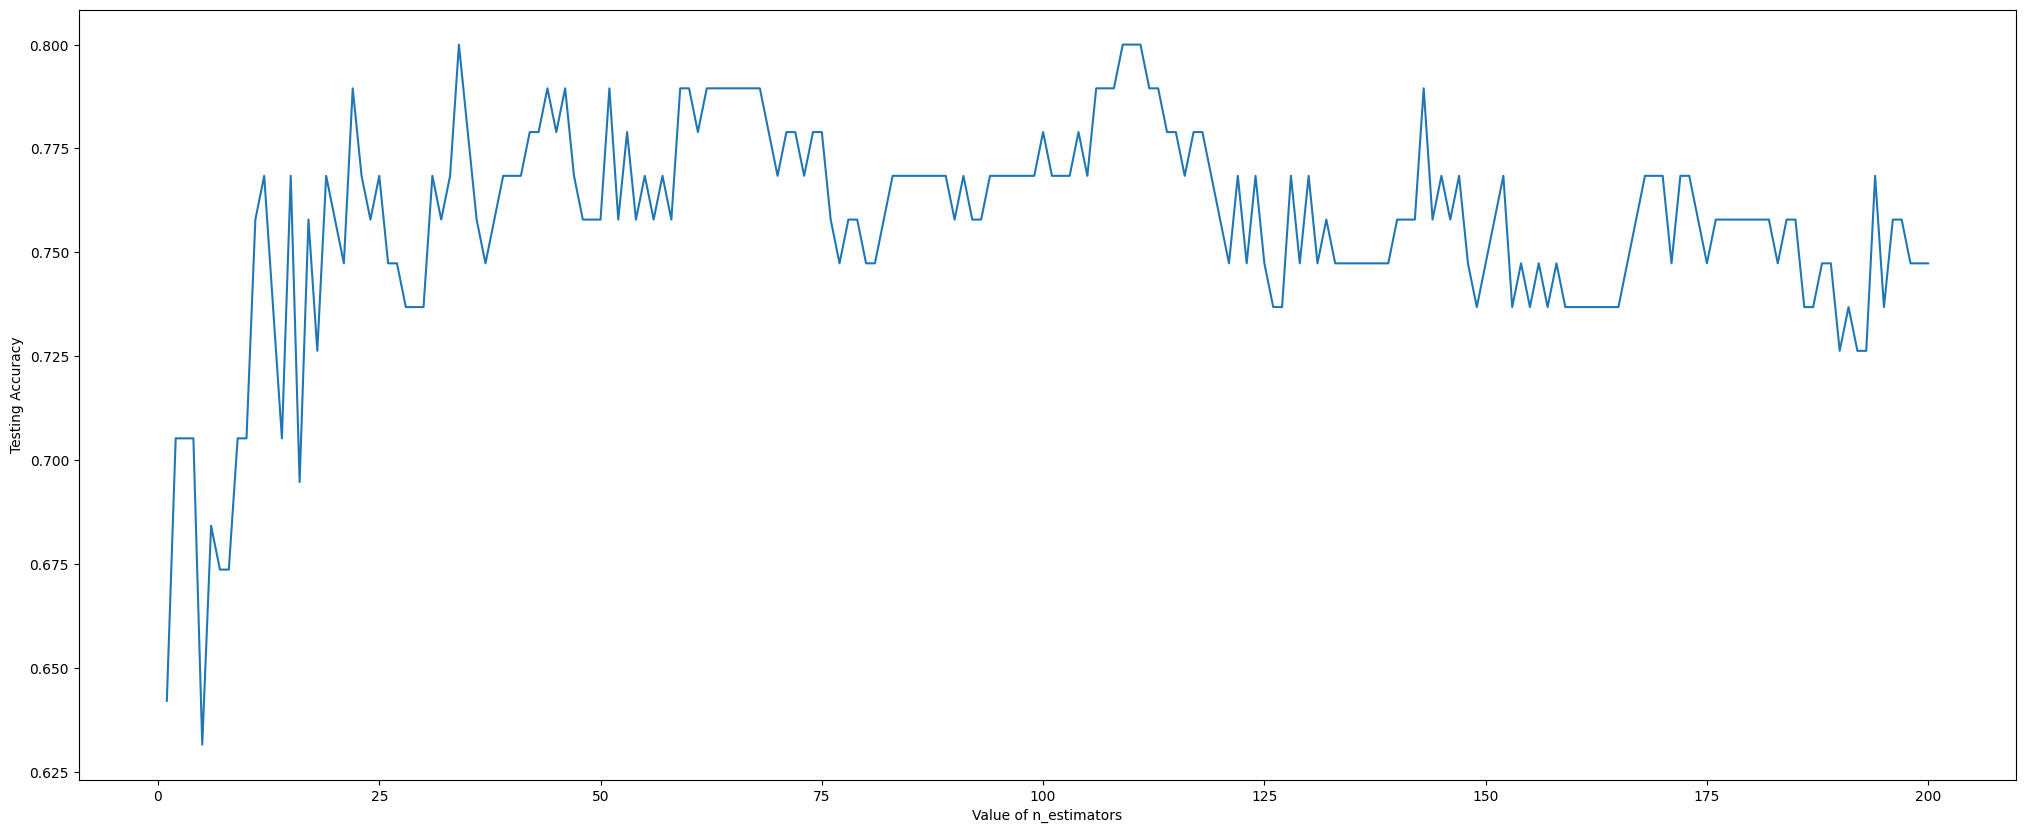

In [24]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[41  9]
 [10 35]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        50
           1       0.80      0.78      0.79        45

    accuracy                           0.80        95
   macro avg       0.80      0.80      0.80        95
weighted avg       0.80      0.80      0.80        95

Accurecy:  0.8




---



---



#Graddient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[43  7]
 [ 7 38]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        50
           1       0.84      0.84      0.84        45

    accuracy                           0.85        95
   macro avg       0.85      0.85      0.85        95
weighted avg       0.85      0.85      0.85        95

Accurecy:  0.8526315789473684


1/150 round completed......................... Accurecy: 0.5894736842105263
2/150 round completed......................... Accurecy: 0.6842105263157895
3/150 round completed......................... Accurecy: 0.7578947368421053
4/150 round completed......................... Accurecy: 0.7473684210526316
5/150 round completed......................... Accurecy: 0.7684210526315789
6/150 round completed......................... Accurecy: 0.7578947368421053
7/150 round completed......................... Accurecy: 0.7578947368421053
8/150 round completed......................... Accurecy: 0.7684210526315789
9/150 round completed......................... Accurecy: 0.7684210526315789
10/150 round completed......................... Accurecy: 0.7684210526315789
11/150 round completed......................... Accurecy: 0.7684210526315789
12/150 round completed......................... Accurecy: 0.7578947368421053
13/150 round completed......................... Accurecy: 0.7578947368421053
14/150 r

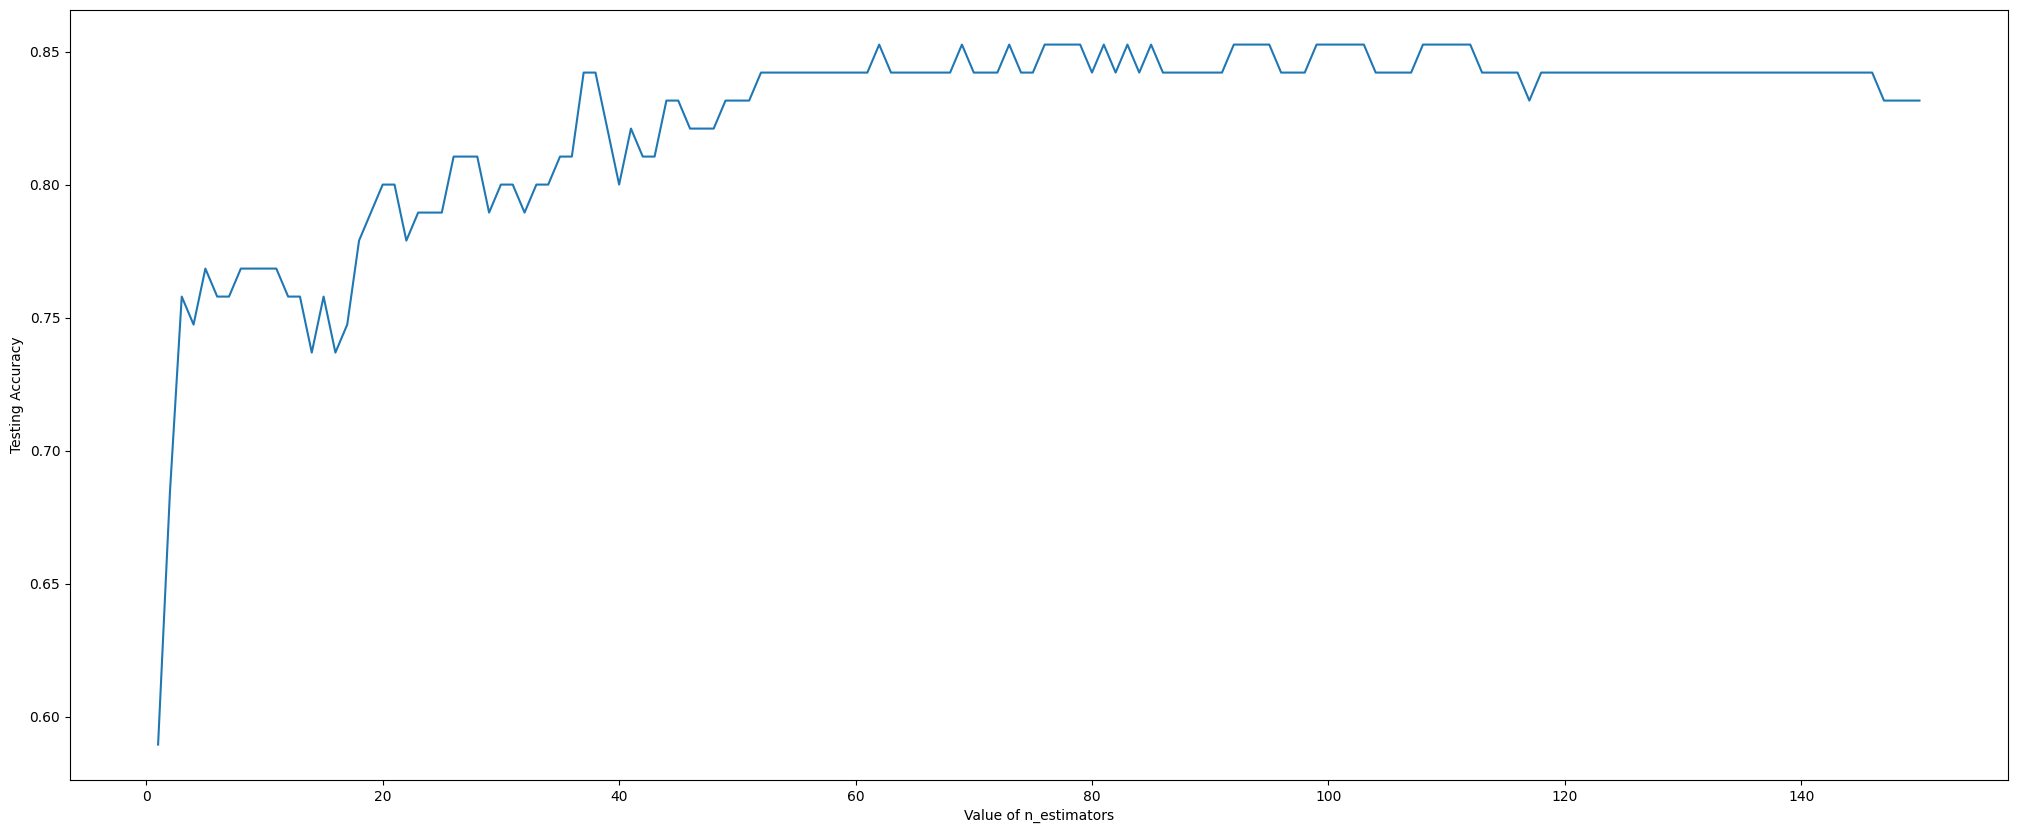

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.7263157894736842
2/30 round completed......................... Accurecy: 0.8421052631578947
3/30 round completed......................... Accurecy: 0.8526315789473684
4/30 round completed......................... Accurecy: 0.8631578947368421
5/30 round completed......................... Accurecy: 0.8631578947368421
6/30 round completed......................... Accurecy: 0.8631578947368421
7/30 round completed......................... Accurecy: 0.8315789473684211
8/30 round completed......................... Accurecy: 0.8105263157894737
9/30 round completed......................... Accurecy: 0.6736842105263158
10/30 round completed......................... Accurecy: 0.6736842105263158
11/30 round completed......................... Accurecy: 0.6947368421052632
12/30 round completed......................... Accurecy: 0.6842105263157895
13/30 round completed......................... Accurecy: 0.7263157894736842
14/30 round completed

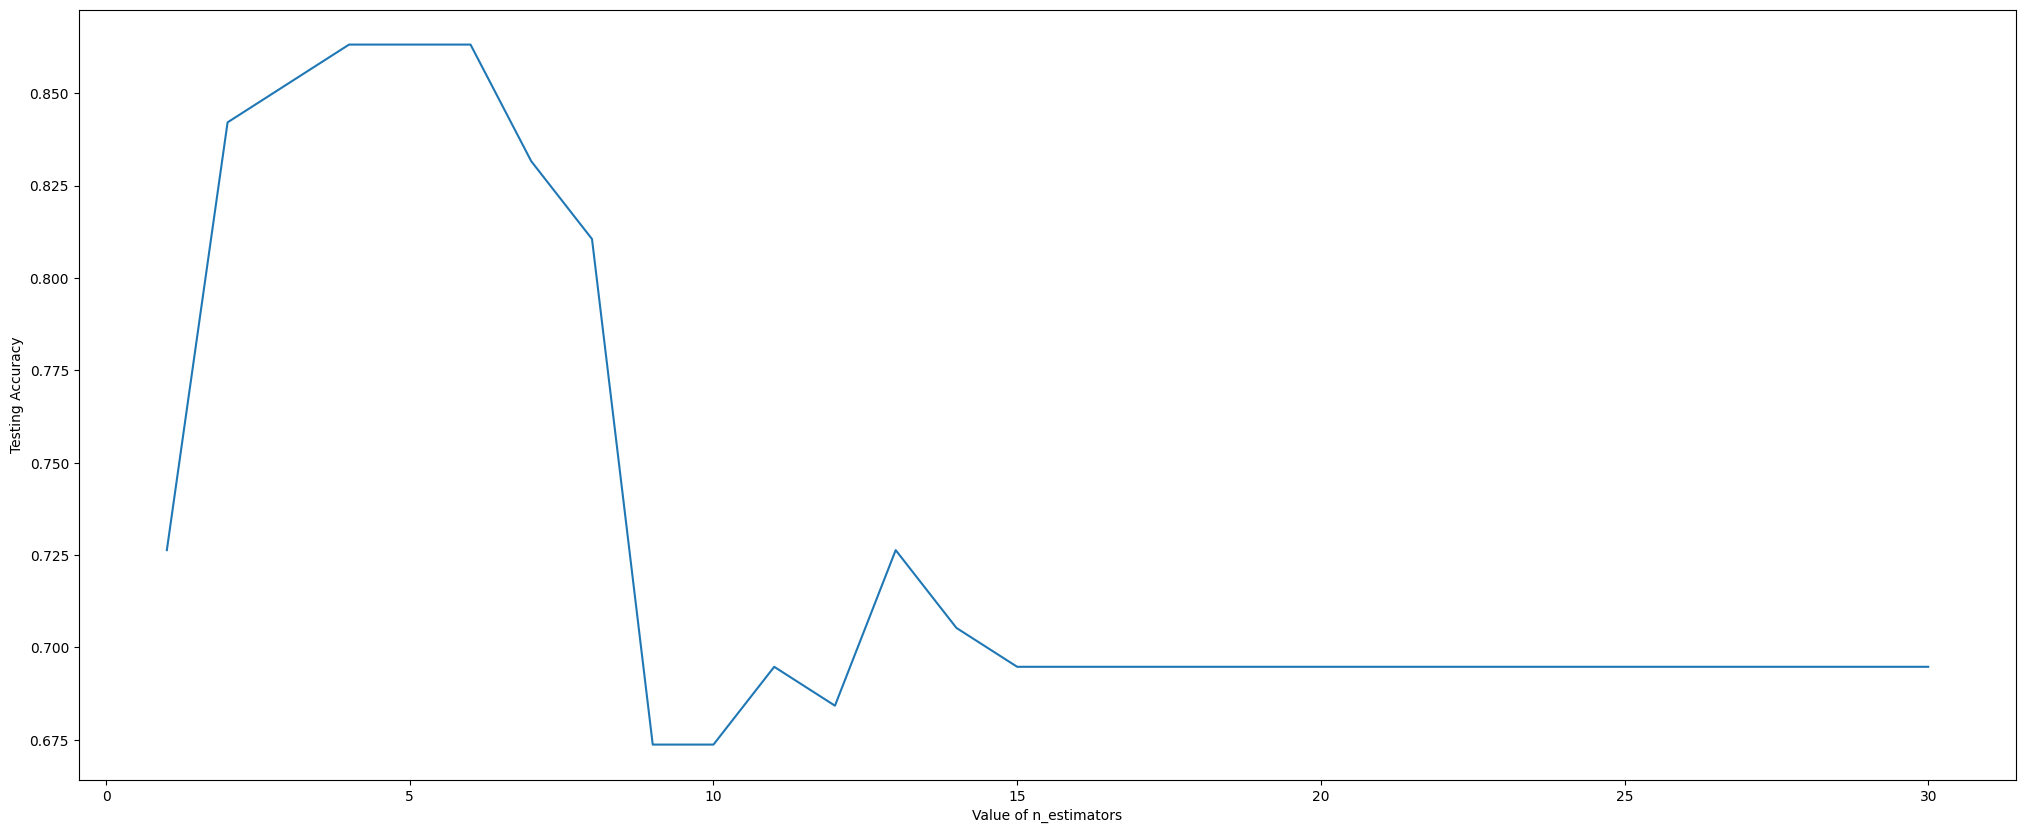

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[43  7]
 [ 7 38]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        50
           1       0.84      0.84      0.84        45

    accuracy                           0.85        95
   macro avg       0.85      0.85      0.85        95
weighted avg       0.85      0.85      0.85        95

Accurecy:  0.8526315789473684


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[43  7]
 [ 6 39]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        50
           1       0.85      0.87      0.86        45

    accuracy                           0.86        95
   macro avg       0.86      0.86      0.86        95
weighted avg       0.86      0.86      0.86        95

Accurecy:  0.8631578947368421


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[43  7]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        50
           1       0.85      0.89      0.87        45

    accuracy                           0.87        95
   macro avg       0.87      0.87      0.87        95
weighted avg       0.87      0.87      0.87        95

Accurecy:  0.8736842105263158




---



---



#Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[37 13]
 [11 34]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        50
           1       0.72      0.76      0.74        45

    accuracy                           0.75        95
   macro avg       0.75      0.75      0.75        95
weighted avg       0.75      0.75      0.75        95

Accurecy:  0.7473684210526316


1/150 round completed......................... Accurecy: 0.6210526315789474
2/150 round completed......................... Accurecy: 0.6736842105263158
3/150 round completed......................... Accurecy: 0.6842105263157895
4/150 round completed......................... Accurecy: 0.7157894736842105
5/150 round completed......................... Accurecy: 0.6842105263157895
6/150 round completed......................... Accurecy: 0.6421052631578947
7/150 round completed......................... Accurecy: 0.6842105263157895
8/150 round completed......................... Accurecy: 0.6736842105263158
9/150 round completed......................... Accurecy: 0.7052631578947368
10/150 round completed......................... Accurecy: 0.7157894736842105
11/150 round completed......................... Accurecy: 0.6947368421052632
12/150 round completed......................... Accurecy: 0.7157894736842105
13/150 round completed......................... Accurecy: 0.7052631578947368
14/150 r

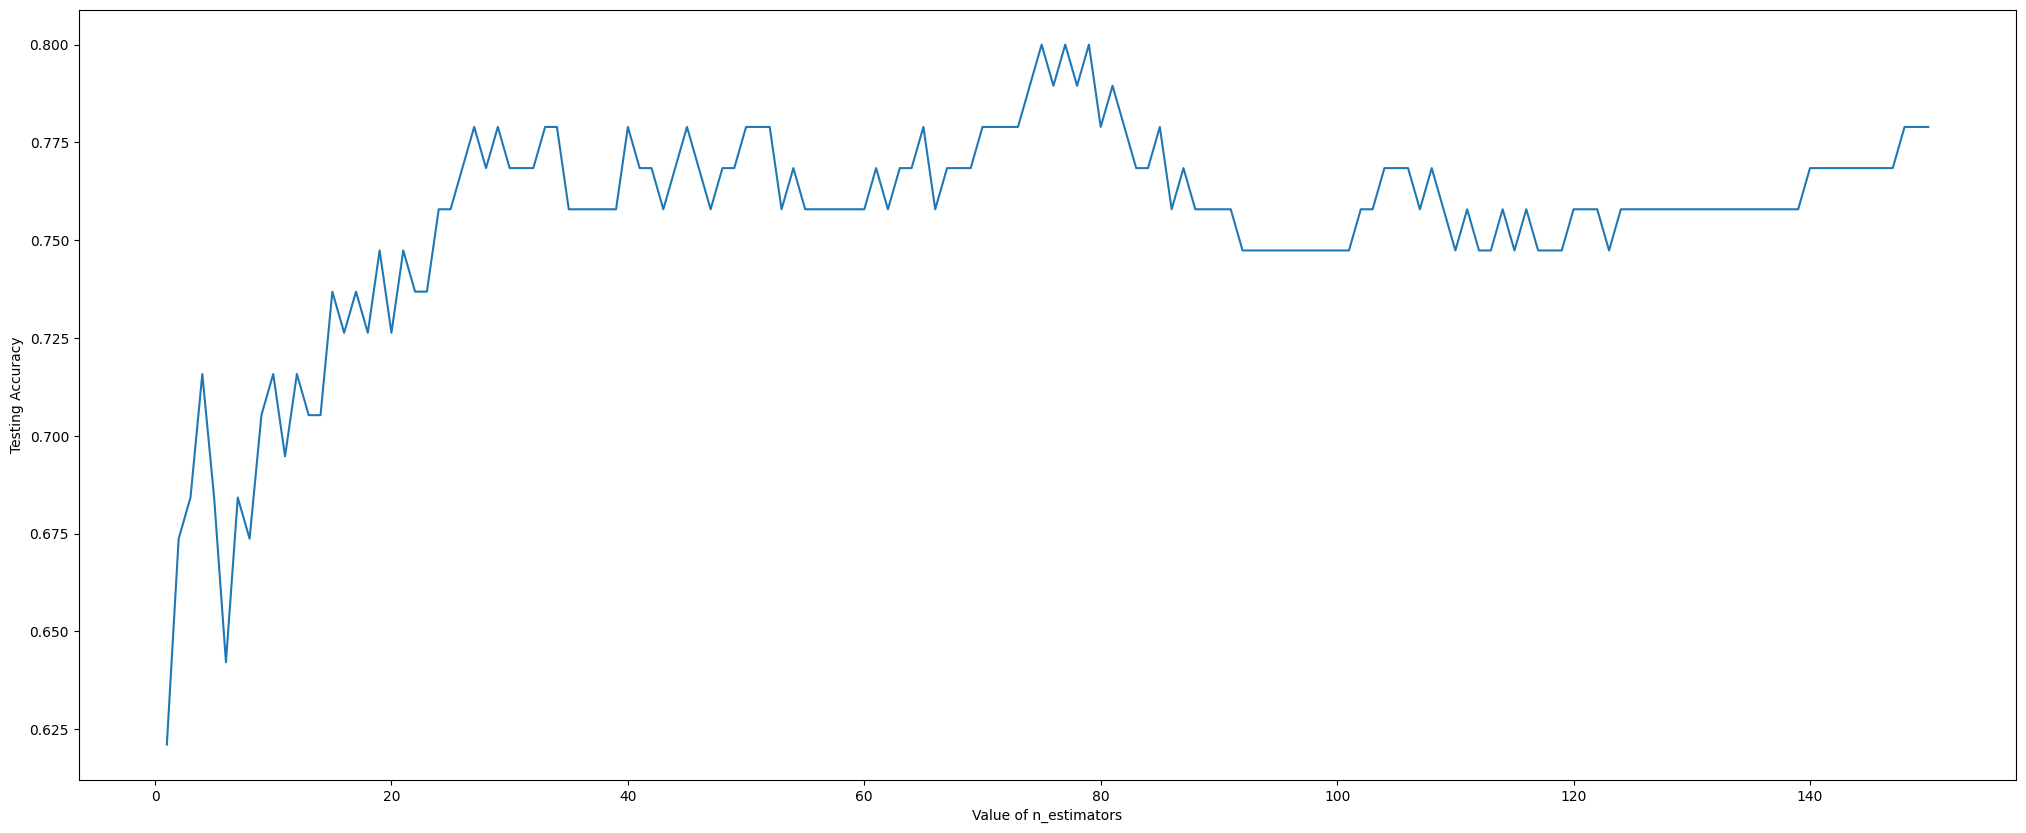

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.7052631578947368
2/150 round completed......................... Accurecy: 0.7473684210526316
3/150 round completed......................... Accurecy: 0.7684210526315789
4/150 round completed......................... Accurecy: 0.7684210526315789
5/150 round completed......................... Accurecy: 0.7684210526315789
6/150 round completed......................... Accurecy: 0.7263157894736842
7/150 round completed......................... Accurecy: 0.8
8/150 round completed......................... Accurecy: 0.7894736842105263
9/150 round completed......................... Accurecy: 0.8
10/150 round completed......................... Accurecy: 0.7473684210526316
11/150 round completed......................... Accurecy: 0.7473684210526316
12/150 round completed......................... Accurecy: 0.7578947368421053
13/150 round completed......................... Accurecy: 0.7578947368421053
14/150 round completed................

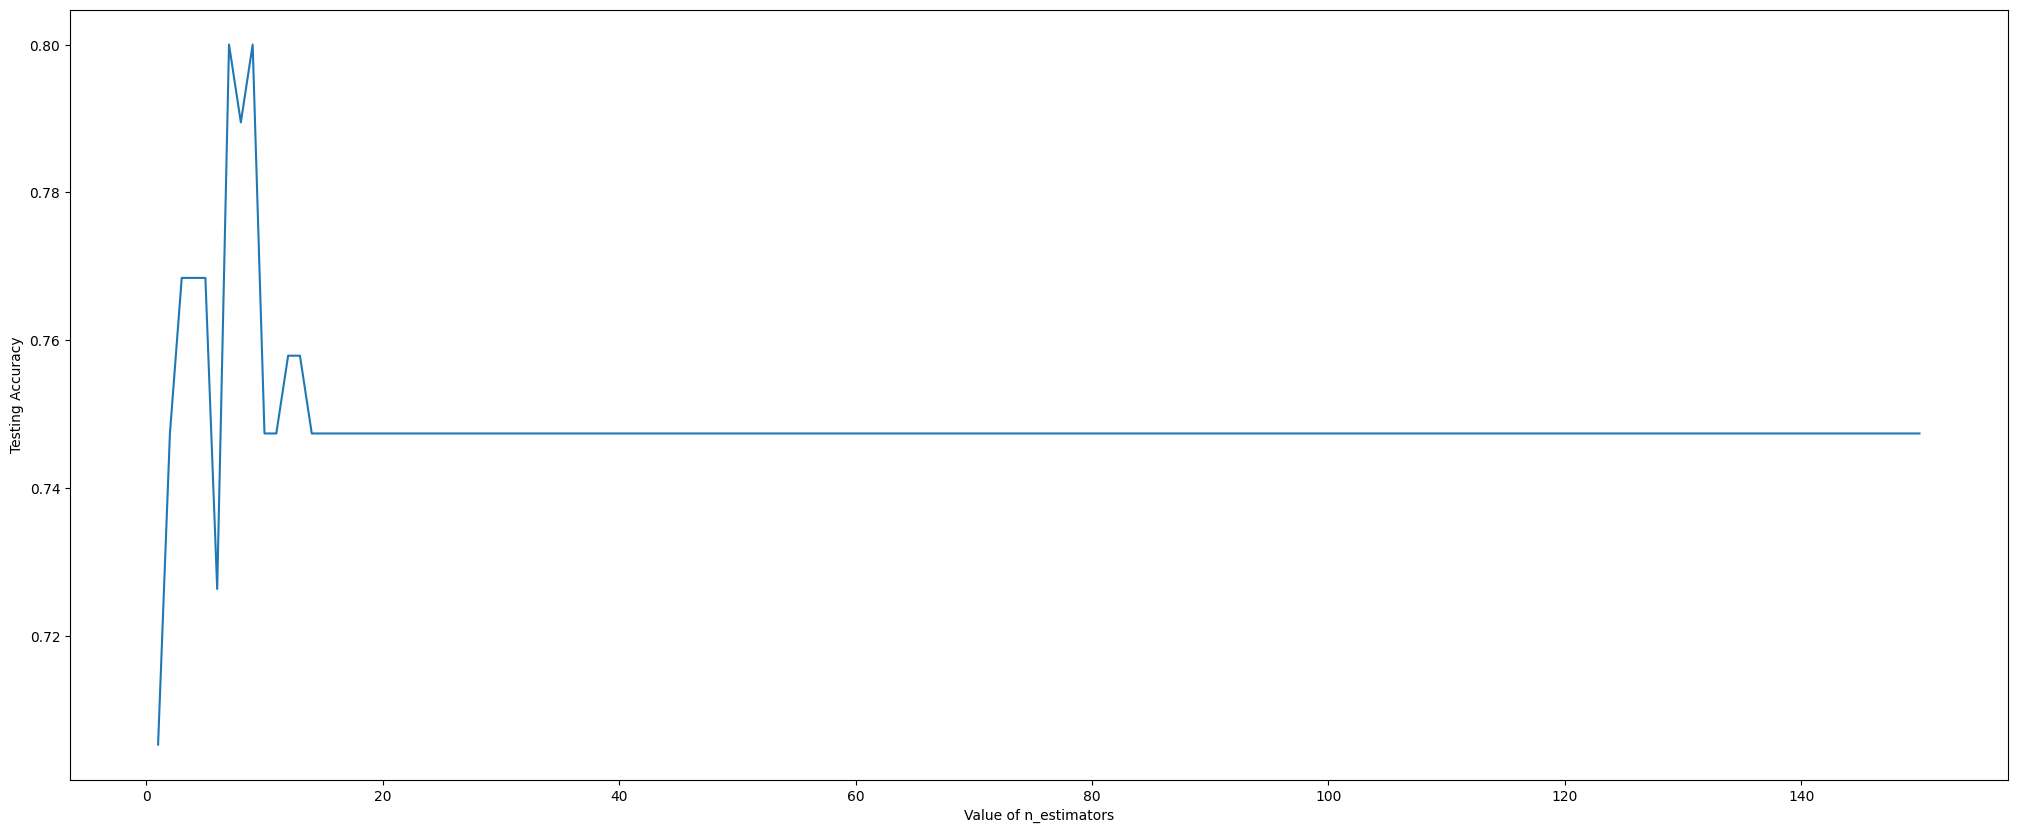

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[38 12]
 [ 7 38]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        50
           1       0.76      0.84      0.80        45

    accuracy                           0.80        95
   macro avg       0.80      0.80      0.80        95
weighted avg       0.80      0.80      0.80        95

Accurecy:  0.8


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[43  7]
 [12 33]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        50
           1       0.82      0.73      0.78        45

    accuracy                           0.80        95
   macro avg       0.80      0.80      0.80        95
weighted avg       0.80      0.80      0.80        95

Accurecy:  0.8


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[43  7]
 [11 34]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        50
           1       0.83      0.76      0.79        45

    accuracy                           0.81        95
   macro avg       0.81      0.81      0.81        95
weighted avg       0.81      0.81      0.81        95

Accurecy:  0.8105263157894737




---



---



#XGB

In [38]:
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[43  7]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        50
           1       0.85      0.89      0.87        45

    accuracy                           0.87        95
   macro avg       0.87      0.87      0.87        95
weighted avg       0.87      0.87      0.87        95

Accurecy:  0.8736842105263158


1/250 round completed......................... Accurecy: 0.6210526315789474
2/250 round completed......................... Accurecy: 0.6421052631578947
3/250 round completed......................... Accurecy: 0.7368421052631579
4/250 round completed......................... Accurecy: 0.6947368421052632
5/250 round completed......................... Accurecy: 0.7684210526315789
6/250 round completed......................... Accurecy: 0.7263157894736842
7/250 round completed......................... Accurecy: 0.7684210526315789
8/250 round completed......................... Accurecy: 0.7473684210526316
9/250 round completed......................... Accurecy: 0.7368421052631579
10/250 round completed......................... Accurecy: 0.7368421052631579
11/250 round completed......................... Accurecy: 0.7894736842105263
12/250 round completed......................... Accurecy: 0.8
13/250 round completed......................... Accurecy: 0.8105263157894737
14/250 round completed.

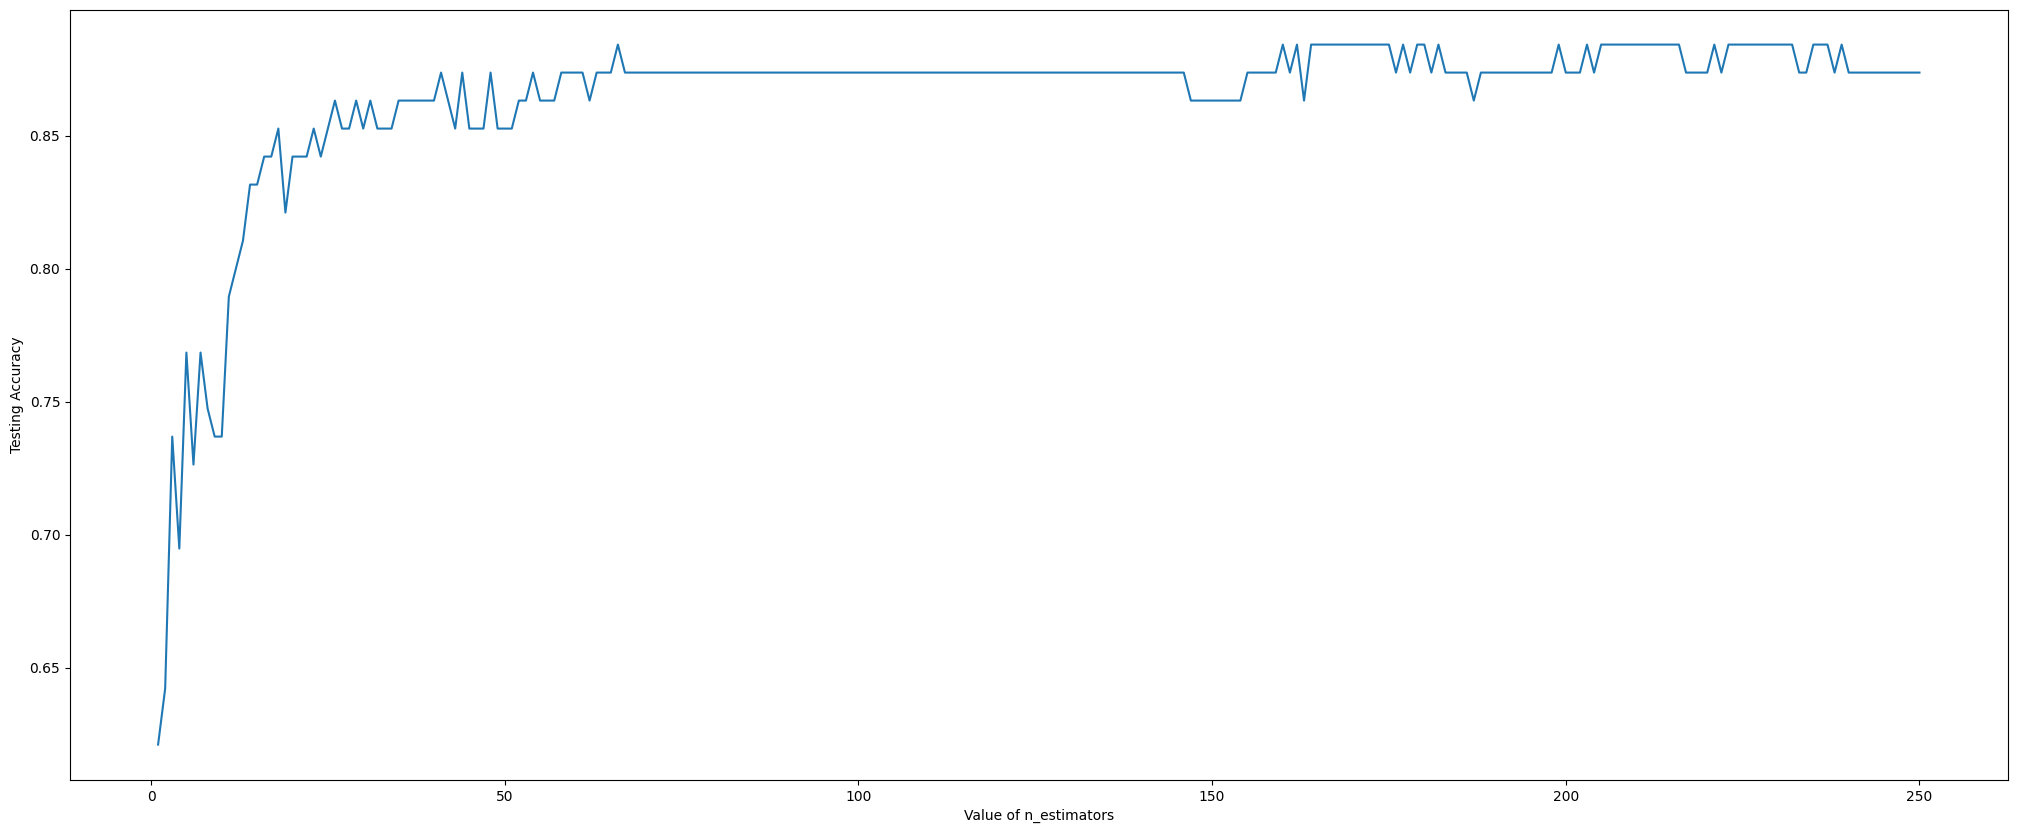

In [39]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.7368421052631579
2/250 round completed......................... Accurecy: 0.8
3/250 round completed......................... Accurecy: 0.8315789473684211
4/250 round completed......................... Accurecy: 0.8631578947368421
5/250 round completed......................... Accurecy: 0.8631578947368421
6/250 round completed......................... Accurecy: 0.8736842105263158
7/250 round completed......................... Accurecy: 0.8526315789473684
8/250 round completed......................... Accurecy: 0.8210526315789474
9/250 round completed......................... Accurecy: 0.8631578947368421
10/250 round completed......................... Accurecy: 0.8631578947368421
11/250 round completed......................... Accurecy: 0.8526315789473684
12/250 round completed......................... Accurecy: 0.8526315789473684
13/250 round completed......................... Accurecy: 0.8526315789473684
14/250 round completed.

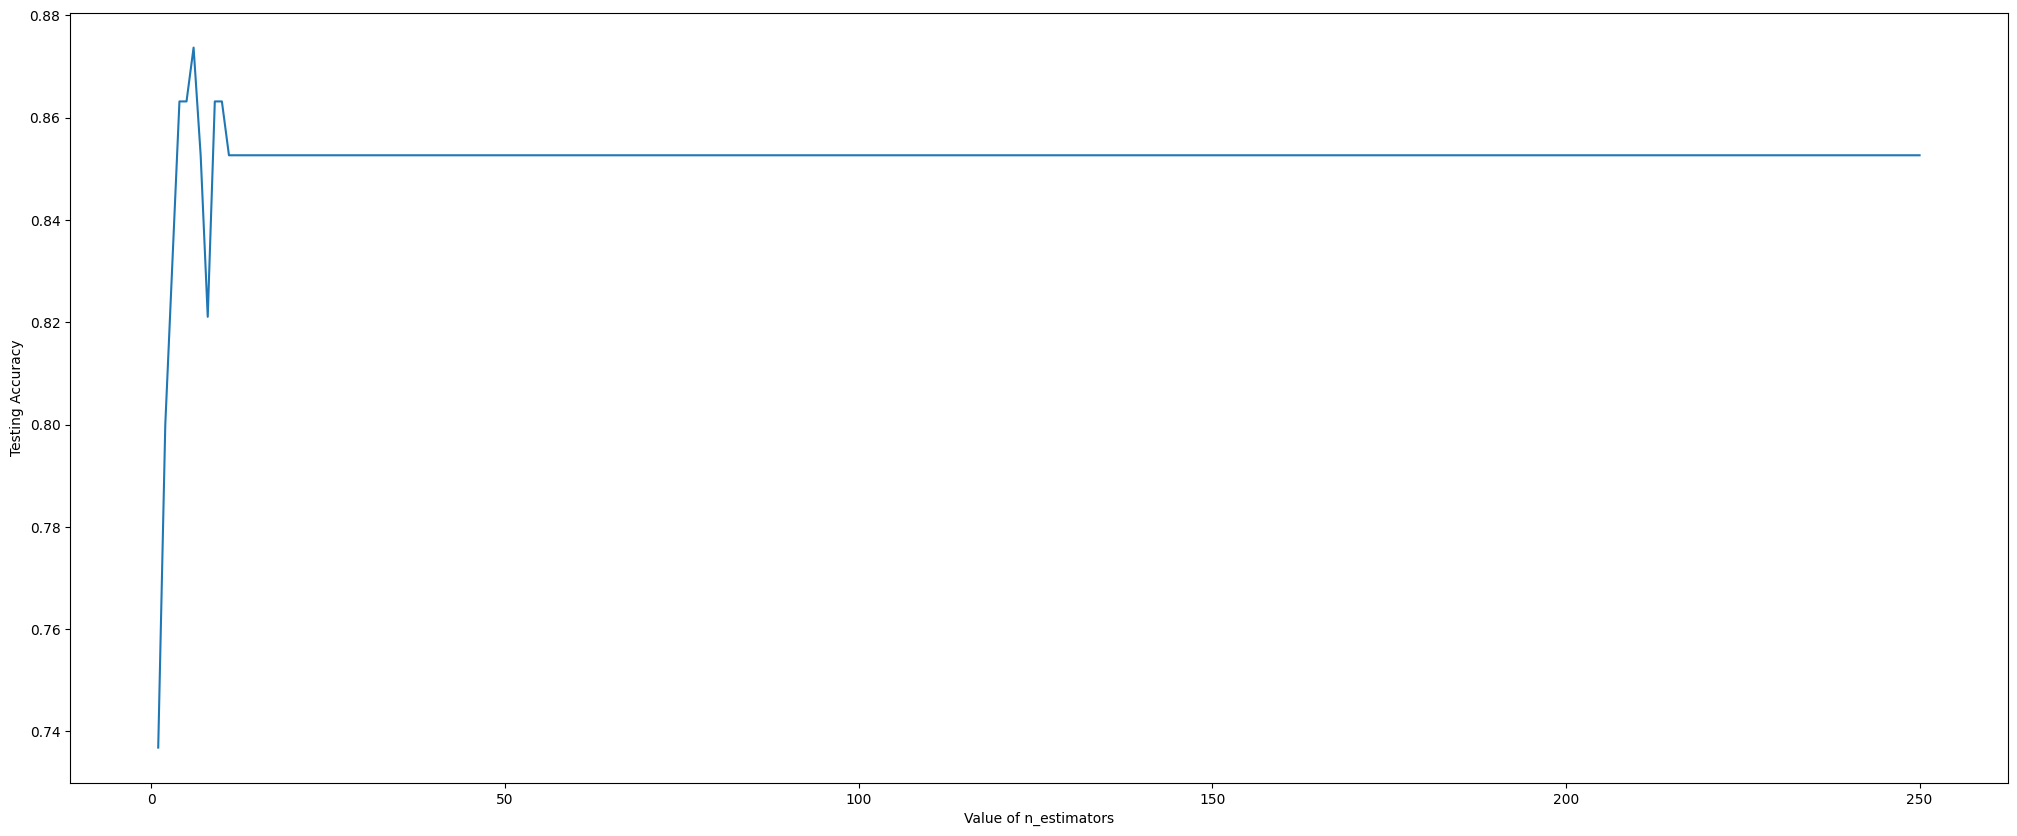

In [40]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [41]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[43  7]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        50
           1       0.85      0.89      0.87        45

    accuracy                           0.87        95
   macro avg       0.87      0.87      0.87        95
weighted avg       0.87      0.87      0.87        95

Accurecy:  0.8736842105263158
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None

In [42]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[44  6]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        50
           1       0.87      0.89      0.88        45

    accuracy                           0.88        95
   macro avg       0.88      0.88      0.88        95
weighted avg       0.88      0.88      0.88        95

Accurecy:  0.8842105263157894
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=N

In [43]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[44  6]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        50
           1       0.87      0.89      0.88        45

    accuracy                           0.88        95
   macro avg       0.88      0.88      0.88        95
weighted avg       0.88      0.88      0.88        95

Accurecy:  0.8842105263157894


#KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[39 11]
 [16 29]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        50
           1       0.72      0.64      0.68        45

    accuracy                           0.72        95
   macro avg       0.72      0.71      0.71        95
weighted avg       0.72      0.72      0.71        95

Accurecy:  0.7157894736842105


1/105 round completed......................... Accurecy: 0.7578947368421053
2/105 round completed......................... Accurecy: 0.7263157894736842
3/105 round completed......................... Accurecy: 0.7578947368421053
4/105 round completed......................... Accurecy: 0.7473684210526316
5/105 round completed......................... Accurecy: 0.7157894736842105
6/105 round completed......................... Accurecy: 0.7263157894736842
7/105 round completed......................... Accurecy: 0.7052631578947368
8/105 round completed......................... Accurecy: 0.7368421052631579
9/105 round completed......................... Accurecy: 0.6947368421052632
10/105 round completed......................... Accurecy: 0.6842105263157895
11/105 round completed......................... Accurecy: 0.6421052631578947
12/105 round completed......................... Accurecy: 0.6736842105263158
13/105 round completed......................... Accurecy: 0.631578947368421
14/105 ro

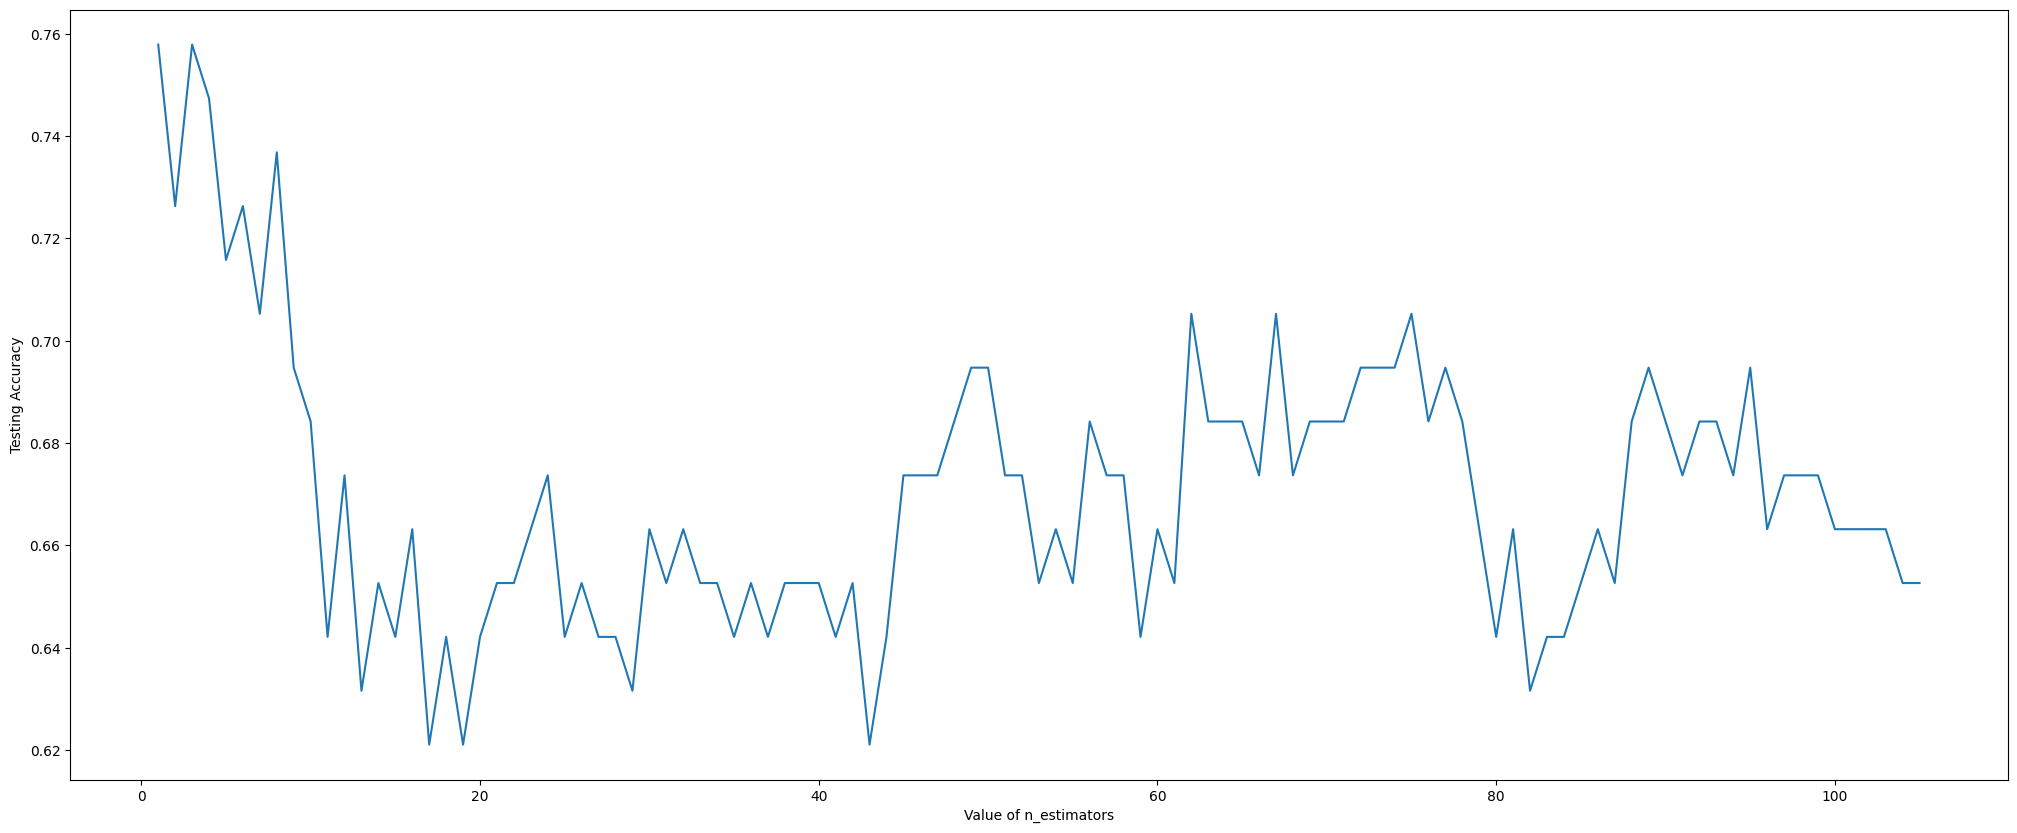

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[37 13]
 [10 35]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        50
           1       0.73      0.78      0.75        45

    accuracy                           0.76        95
   macro avg       0.76      0.76      0.76        95
weighted avg       0.76      0.76      0.76        95

Accurecy:  0.7578947368421053


#NB

In [47]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[47  3]
 [37  8]]
              precision    recall  f1-score   support

           0       0.56      0.94      0.70        50
           1       0.73      0.18      0.29        45

    accuracy                           0.58        95
   macro avg       0.64      0.56      0.49        95
weighted avg       0.64      0.58      0.50        95

Accurecy:  0.5789473684210527


#Histogram-Based Gradient Boosting

In [48]:
from sklearn.ensemble import HistGradientBoostingClassifier

hisgradBoost_default = HistGradientBoostingClassifier(random_state=0)
hisgradBoost_default.fit(X_train, y_train)
y_pred = hisgradBoost_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_default,7,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)


[[43  7]
 [ 9 36]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        50
           1       0.84      0.80      0.82        45

    accuracy                           0.83        95
   macro avg       0.83      0.83      0.83        95
weighted avg       0.83      0.83      0.83        95

Accurecy:  0.8315789473684211


100/1000 round completed......................... Accurecy: 0.8315789473684211
200/1000 round completed......................... Accurecy: 0.8631578947368421
300/1000 round completed......................... Accurecy: 0.8736842105263158
400/1000 round completed......................... Accurecy: 0.8842105263157894
500/1000 round completed......................... Accurecy: 0.8631578947368421
600/1000 round completed......................... Accurecy: 0.8631578947368421
700/1000 round completed......................... Accurecy: 0.8526315789473684
800/1000 round completed......................... Accurecy: 0.8526315789473684
900/1000 round completed......................... Accurecy: 0.8526315789473684
1000/1000 round completed......................... Accurecy: 0.8526315789473684
The best max_iter:
400


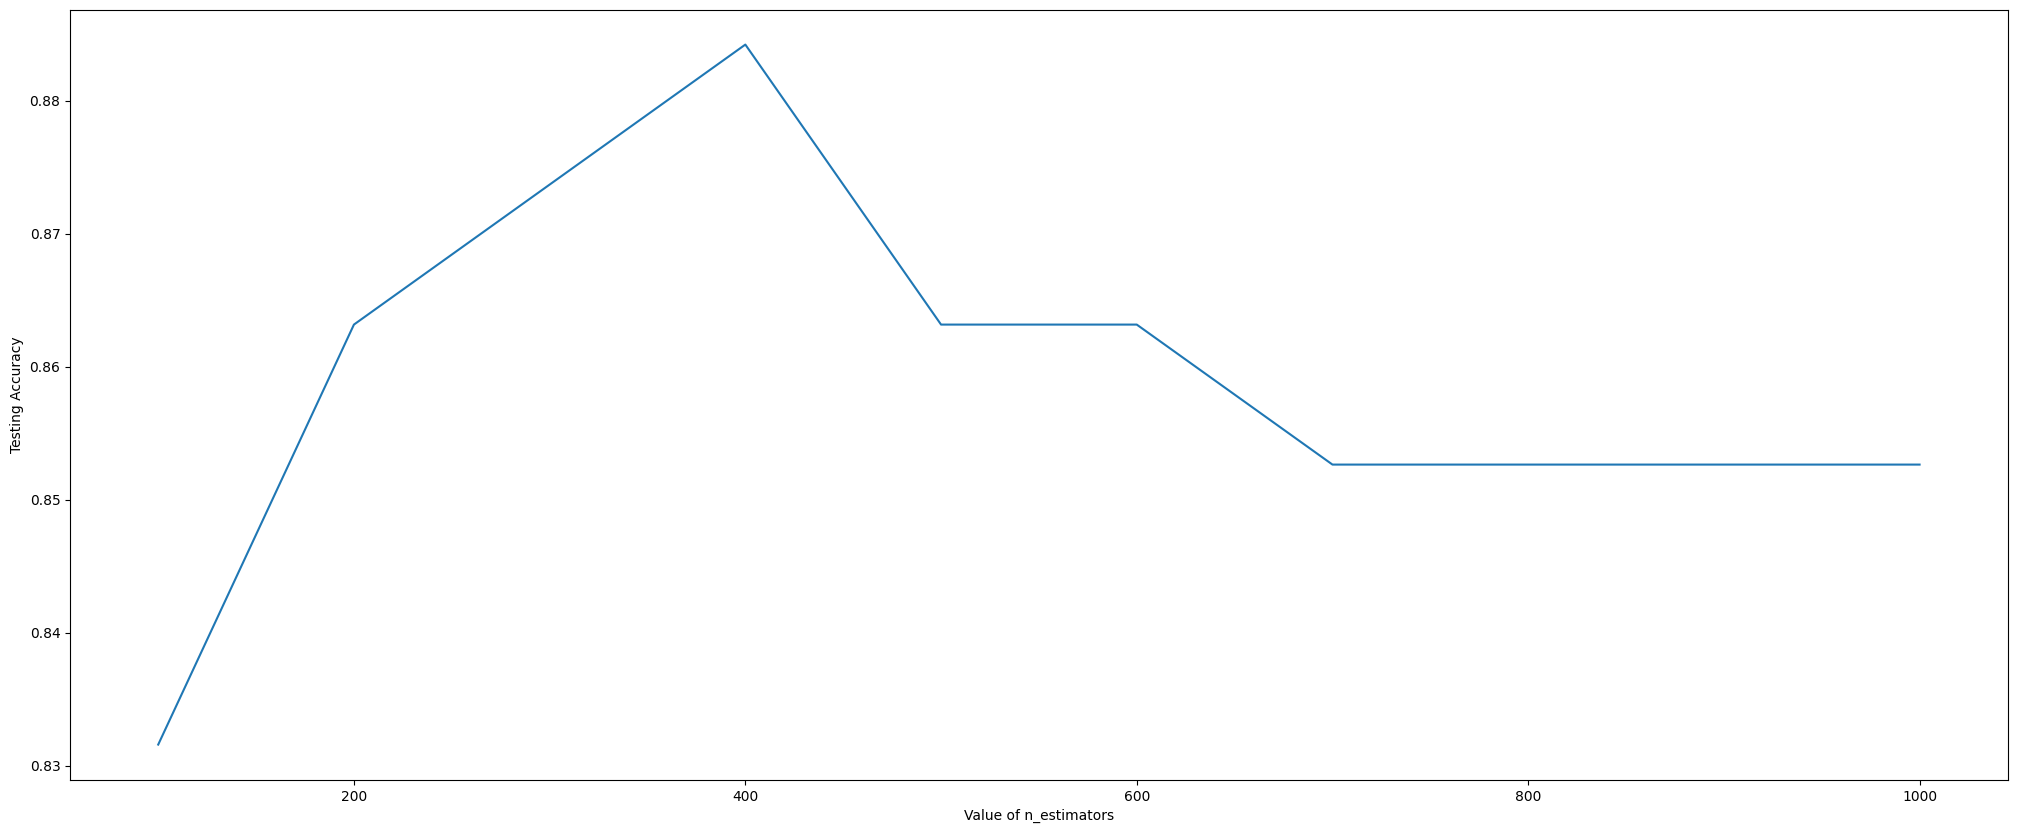

In [49]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=1000
k_range = range (100,N+1,100)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_iter=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_iter:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/50 round completed......................... Accurecy: 0.7157894736842105
2/50 round completed......................... Accurecy: 0.7789473684210526
3/50 round completed......................... Accurecy: 0.7789473684210526
4/50 round completed......................... Accurecy: 0.7789473684210526
5/50 round completed......................... Accurecy: 0.8210526315789474
6/50 round completed......................... Accurecy: 0.8105263157894737
7/50 round completed......................... Accurecy: 0.8526315789473684
8/50 round completed......................... Accurecy: 0.8421052631578947
9/50 round completed......................... Accurecy: 0.8736842105263158
10/50 round completed......................... Accurecy: 0.8526315789473684
11/50 round completed......................... Accurecy: 0.8315789473684211
12/50 round completed......................... Accurecy: 0.8315789473684211
13/50 round completed......................... Accurecy: 0.8315789473684211
14/50 round completed

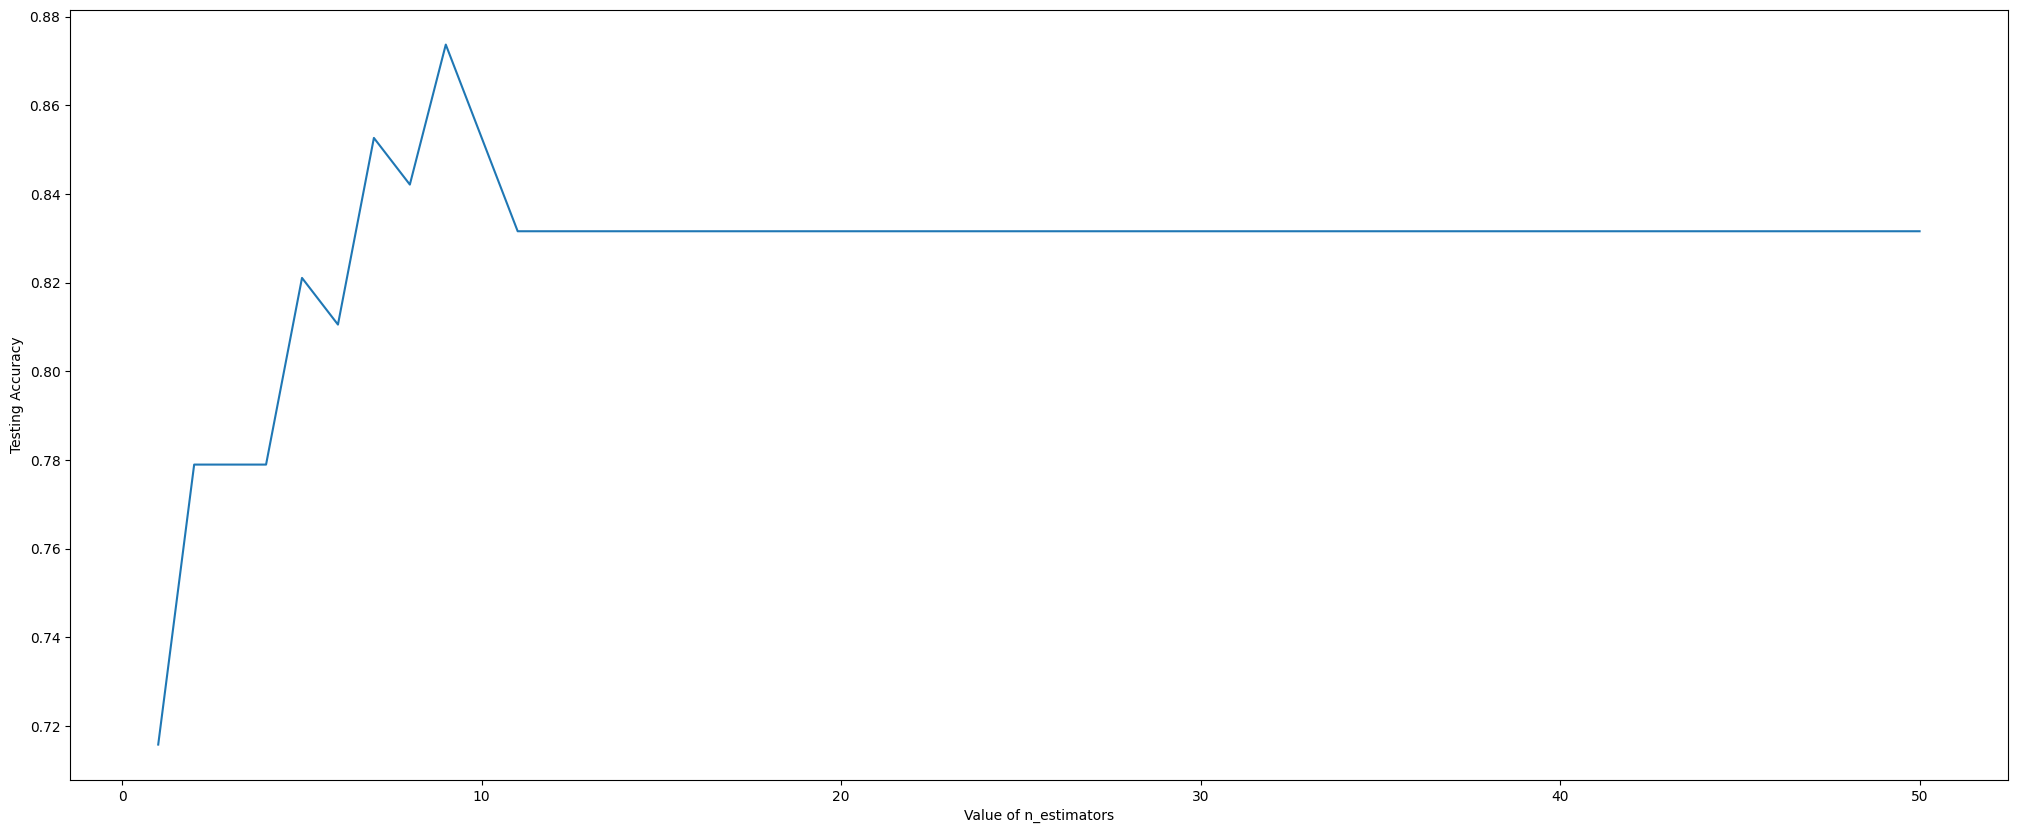

In [50]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_depth=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_depth:")
max_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(max_depth)

In [51]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_iter = HistGradientBoostingClassifier(max_iter=best_estimator,random_state=0)
hisgradBoost_max_iter.fit(X_train, y_train)
y_pred = hisgradBoost_max_iter.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_iter,8,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[45  5]
 [ 6 39]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.89      0.87      0.88        45

    accuracy                           0.88        95
   macro avg       0.88      0.88      0.88        95
weighted avg       0.88      0.88      0.88        95

Accurecy:  0.8842105263157894


In [52]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_depth = HistGradientBoostingClassifier(max_depth=max_depth,random_state=0)
hisgradBoost_max_depth.fit(X_train, y_train)
y_pred = hisgradBoost_max_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_depth,9,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[46  4]
 [ 8 37]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       0.90      0.82      0.86        45

    accuracy                           0.87        95
   macro avg       0.88      0.87      0.87        95
weighted avg       0.88      0.87      0.87        95

Accurecy:  0.8736842105263158


In [53]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=max_depth,random_state=0)
hisgradBoost_all.fit(X_train, y_train)
y_pred = hisgradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_all,10,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[46  4]
 [ 7 38]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        50
           1       0.90      0.84      0.87        45

    accuracy                           0.88        95
   macro avg       0.89      0.88      0.88        95
weighted avg       0.89      0.88      0.88        95

Accurecy:  0.8842105263157894


#Result

In [54]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()

AdaBoostClassifier(random_state=0) 1  :  0.7578947368421053
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=34, random_state=0) 1  :  0.8
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.8526315789473684
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=62, random_state=0) 2  :  0.8526315789473684
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=4, random_state=0) 2  :  0.8631578947368421
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=4, n_estimators=62, random_state=0) 2  :  0.8736842105263158
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.7473684210526316
---------------------------------------------------------------

RandomForestClassifier(n_es

In [55]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=66, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...), 4, 'xgboost')   :  0.8842105263157894
-------------------------------------------------------------------------------------------------
(XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample

In [56]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=66, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...), 'xgboost')
(HistGradientBoostingClassifier(max_iter=400, random_state=0), 'HistGradientBoostingClassifier')
(HistGradientBoostingClassifier(max_depth=9, max_iter=400, random_state=0), 'HistGradientBoostingClassifier')
(GradientBoost

In [57]:
len(best_models)

4

#Testing Accuracy For Best 4 Models

In [58]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=66, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)
[[44  6]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        50
           1       0.87      0.89      0.88        45

    accuracy 

#SHAP

In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.3 MB/s eta 0:00:00


In [ ]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_train)

  shap_values1 = explainer(X_train)
  features_names=list_of_feat1

  if 'Subjects' in features_names:
    features_names.pop(0)

  print("Global Explaination")
  shap.plots.bar(shap_values1,max_display=30,show=False)

  plt.xlabel('Mean SHAP value',fontweight="bold",fontsize=13)
  plt.ylabel('Features',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()
  print("Global Explaination")

  shap.summary_plot(shap_values1,max_display=30,show=False)
  plt.xlabel('Mean SHAP value',fontweight="bold",fontsize=13)
  plt.ylabel('Features',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()
  print("__________________________")
  shap.plots.violin(shap_values1, feature_names=features_names, plot_type="layered_violin",max_display=30,show=False)
  plt.xlabel('Mean SHAP value',fontweight="bold",fontsize=13)
  plt.ylabel('Features',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()
  print("Local Explaination")
  shap.plots.violin(shap_values1,feature_names=features_names, max_display=30,show=False)
  plt.xlabel('Mean SHAP value',fontweight="bold",fontsize=13)
  plt.ylabel('Features',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()

  print("___________________________")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=25,show=False)
  plt.xlabel('Model Output',fontweight="bold",fontsize=13)
  plt.ylabel('Features',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()


  print("Local Explaination")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=25,show=False)
  plt.xlabel('Mean SHAP value',fontweight="bold",fontsize=13)
  plt.ylabel('Features',fontweight="bold",fontsize=13)
  plt.xticks(fontsize=13, weight = 'bold')
  plt.yticks(fontsize=13, weight = 'bold')

  plt.show()

**Model Check Box Function**

In [ ]:

def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

In [ ]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=73, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=121, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=6, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=6, n_estimators=121, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=34, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, n_estimators=34, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

In [ ]:
graph_feat={
    "max_display":30,
    "shap_values Index":10
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [ ]:
def Conf_Mat_percent(X_,y_,attb,keys):

  import matplotlib.pyplot as plt
  from yellowbrick.classifier import ConfusionMatrix
  import matplotlib.dates as dates

  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)


  for i in range(len(keys)):
    if keys[i].value ==True:
      cm = ConfusionMatrix(models[i], classes=['Control', 'Stroke'],fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax,percent=True,fontweight="bold")

      if str(models[i])[:3] == "XGB":
        cm.fit(X_train.values, y_train.values)
        cm.score(X_.values, y_.values)
      else:
        cm.fit(X_train, y_train)
        cm.score(X_, y_)
      cm.ax.set_title(str(models[i]), fontsize=75, fontweight="bold")
      cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
      cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
      cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
      cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
      for label in ax.get_xticklabels():
        label.set_fontweight(850)
      for label in ax.get_yticklabels():
        label.set_fontweight(850)

      plt.savefig(attb["type"]+"_Confusion_mat("+str(models[i])+").png")
      cm.show()
      print("--------------------")
      print("--------------------")

In [ ]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=73, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=121, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=6, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=6, n_estimators=121, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=34, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, n_estimators=34, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

In [ ]:
'''
from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes, percent=True)

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()
'''

'\nfrom yellowbrick.classifier import ConfusionMatrix\n\n\nfor i in range(len(new_keys_6)):\n  if new_keys_6[i].value ==True:\n    cm = ConfusionMatrix(models[i], classes=classes, percent=True)\n\n    cm.fit(X_train, y_train)\n    cm.score(X_test, y_test)\n    cm.show()\n'

X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names


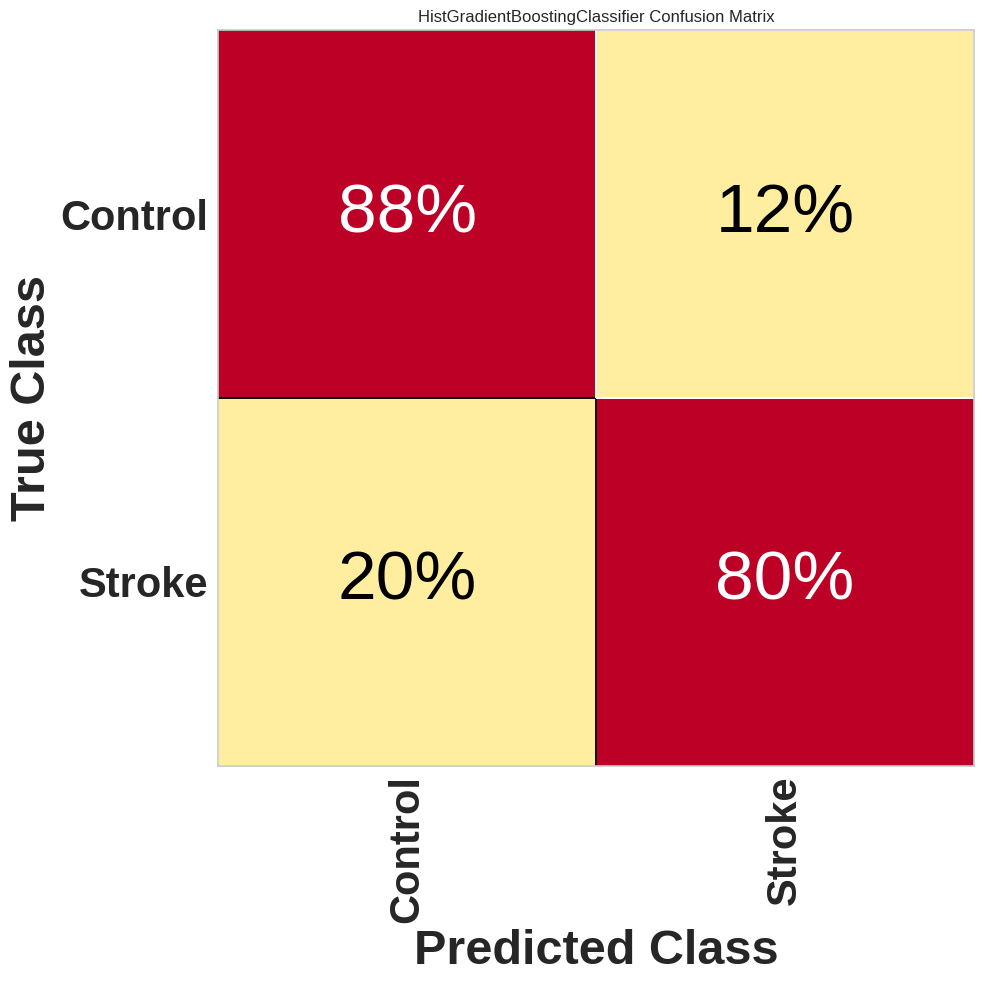

--------------------
--------------------


In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10,

  "Y Axis Fontsize" : 35,
  "X Axis Fontsize" : 35,

  "Y Label Fontsize" : 30,
  "X Label Fontsize" : 30,

  "Confusion Matrix Inner Fontsize": 50,
  "type"  : "Training"

}

Conf_Mat_percent(X_test,y_test,attributes,new_keys_6)

#Confusion Matrix For Training

In [ ]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=73, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=121, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=6, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=6, n_estimators=121, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=34, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, n_estimators=34, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

In [ ]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [ ]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Tinnitus'
  return my_list

In [ ]:
new_keys_4=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=73, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=121, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=6, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=6, n_estimators=121, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=34, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, n_estimators=34, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

In [ ]:
for i in range(len(new_keys_4)):
  if new_keys_4[i].value ==True:
    temp=X_test

    prediction_cls = reverse_transfrom(list(models[i].predict(X_test[0:])))
    actual_cls = reverse_transfrom(list(y_test[0:]))

    temp["Actual"] = actual_cls
    temp["Predicted"] = prediction_cls

    temp.to_csv(str(models[i])+".csv")

#ROC Comparaing Machine Learning Models

In [ ]:

def ROC(mod,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=str(mod[i])+' (AUROC = %0.3f)' % model_auc[i], lw = 5)

  # Title
  plt.title('ROC Plot Testing',fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])

  plt.legend(
           prop = {'size' : graph_feat["legend Font Size"]},
           loc = graph_feat["legend Position"])
  plt.xticks(fontsize=20, weight = 'bold')
  plt.yticks(fontsize=20, weight = 'bold')
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

***Training ROC***<br>
Chosse the Models

In [ ]:
new_keys_2=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=73, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=121, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=6, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=6, n_estimators=121, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=34, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, n_estimators=34, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)


Change  the given dictionary of graph feature for desire graph.

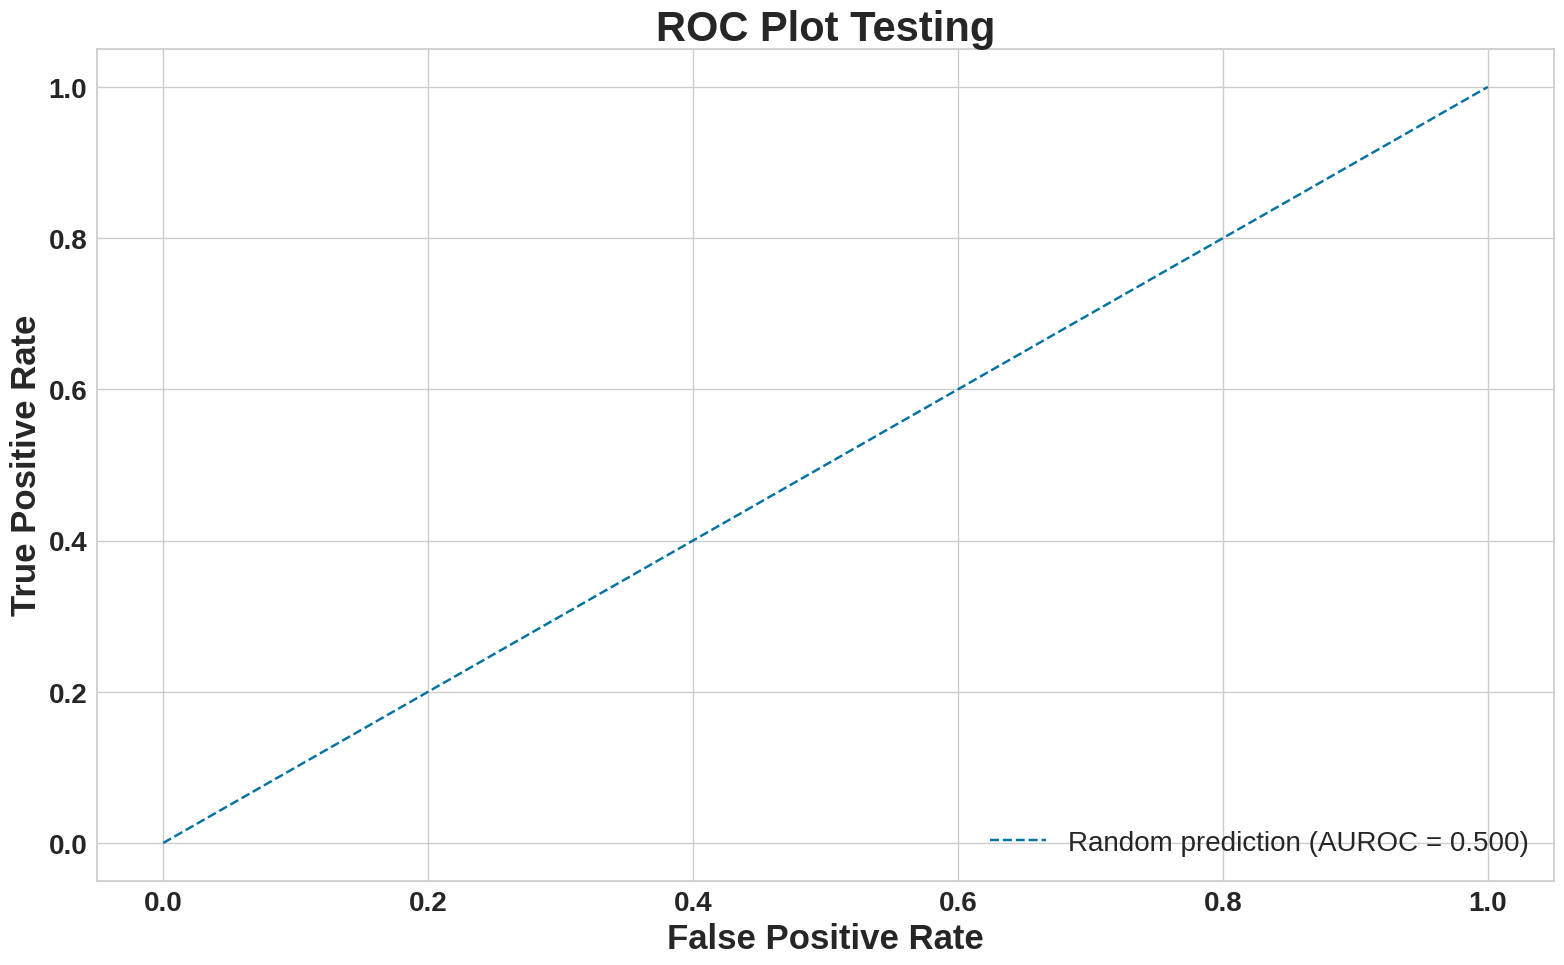

In [ ]:
graph_feat={
    "Title Size":30,
    "Title Fontweight":'bold',

    "legend Font Size": 20,
    "legend Position": "lower right",
    "legend Fontweight":'bold',

    "X axis Label Font Size":25,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":25,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_2)):
  if new_keys_2[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)



---



***Testing ROC***<br>
Chosse the Models

In [ ]:
new_keys_3=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=73, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=121, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=6, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=6, n_estimators=121, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=34, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, n_estimators=34, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)


Change  the given dictionary of graph feature for desire graph.

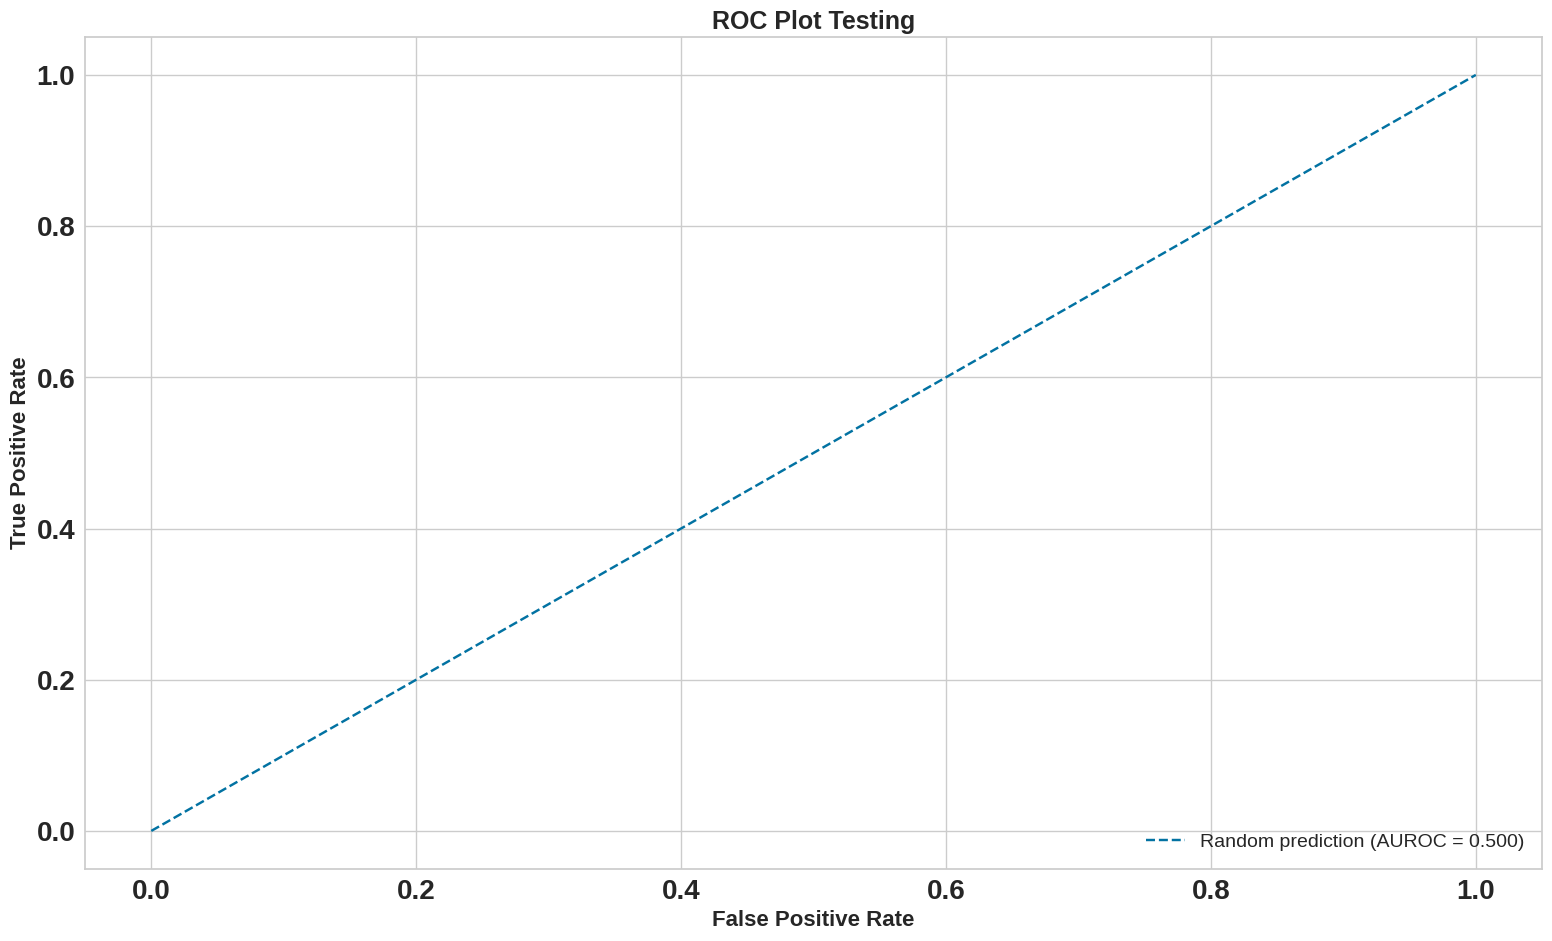

In [ ]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_3)):
  if new_keys_3[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)

# **Performance Matrces_Test Dataset**

In [59]:
model_compare = models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=34, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=62, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, n_estimators=62, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=75, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=7, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=7, n_estimators=75, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_iter=400, random_state=0)', indent=False…

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=9, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=9, max_iter=400, random_state=0)',…

In [224]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



def plotly_plot(df):
  fig = px.bar(df, y=df.columns[1], x=df.columns[0], text_auto='.0%')
  fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False,width=0.4)
  fig.update_layout(
    xaxis_title="<b>"+df.columns[1]+"</b>",
    yaxis_title="<b>"+df.columns[0]+"</b>",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"

	))
  fig.update_xaxes(tickfont_size=20, ticks="outside", ticklen=20, tickwidth=2,tickfont_family="Arial Black")
  fig.update_yaxes(tickfont_size=20, ticks="outside", ticklen=20, tickwidth=2,tickfont_family="Arial Black")
  fig.show()



def plot_model_comp(df):
  plt.figure(figsize=(8, 6))
  sns.set_style("darkgrid", {'grid.color': 'black', 'grid.linestyle': '-'})
  ax = sns.barplot(data=df, x=df.columns[0], y=df.columns[1])

  ax.set_xlabel("Models", fontdict={'size': 40, 'weight': 'bold'})
  ax.set_ylabel("Scores", fontdict={'size': 40, 'weight': 'bold'})
  #ax.tick_params(axis='both', which='major', labelsize=14,fontweight='bold')


  plt.yticks(fontsize=20,fontweight='bold')
  plt.xticks(fontsize=20,fontweight='bold')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75, fontsize=20,fontweight='bold')

  plt.show()


model_name_dic={
    "GradientBoostingClassifier" : "GBoosting",
    "RandomForestClassifier" : "RF",
    "HistGradientBoostingClassifier": "HistGBoosting",
    "XGBClassifier" : "XGB",
    "KNeighborsClassifier" : "KNN",
    "GaussianNB" : "GaussianNB",
    "AdaBoostClassifier": "AdBoosting"
}





m=[]
acc=[]
precision_list=[]
recall_list=[]
f1_score_list=[]



for i in range(len(model_compare)):
  if model_compare[i].value ==True:
    y_pred = models[i].predict(X_test)
    m.append(model_name_dic[str(models[i]).split('(')[0]])
    acc.append(accuracy_score(y_pred,y_test))
    precision_list.append(precision_score(y_pred,y_test))
    recall_list.append(recall_score(y_pred,y_test))
    f1_score_list.append(f1_score(y_pred,y_test))




df_accu = {
    "Models" : m,
    "Accurecy" : acc,

}
df_accu = pd.DataFrame.from_dict(df_accu)


df_precision={
    "Models" : m,
    "Precision" : precision_list
}
df_precision = pd.DataFrame.from_dict(df_precision)

df_recall = {
    "Models" : m,
    "Recall" : recall_list
}
df_recall = pd.DataFrame.from_dict(df_recall)

df_f1_score = {
    "Models" : m,
    "f1_score" : f1_score_list
}
df_f1_score = pd.DataFrame.from_dict(df_f1_score)

##Accurecy

In [225]:
plotly_plot(df_accu)

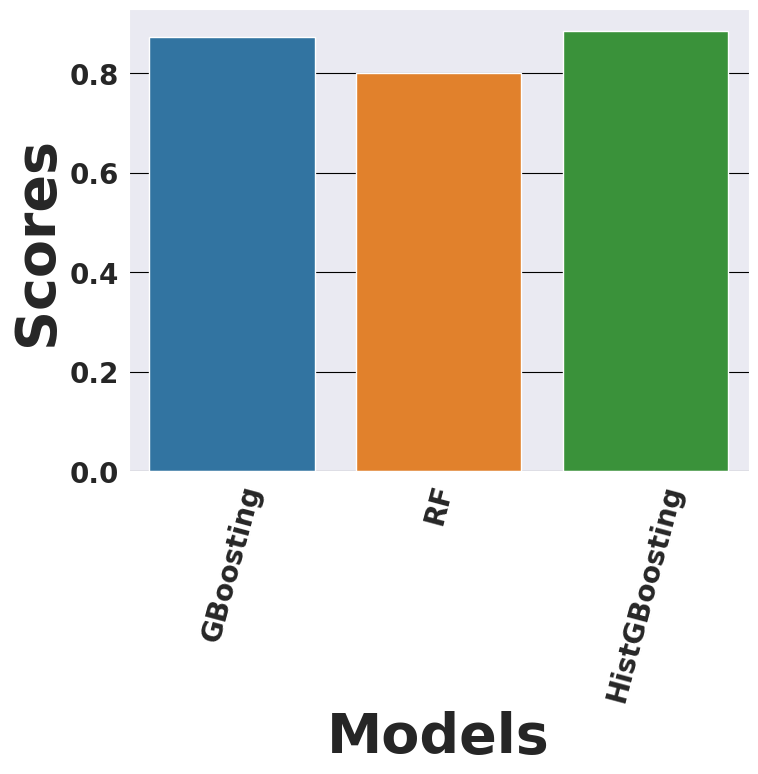

In [226]:
plot_model_comp(df_accu)

##Precision

In [212]:
plotly_plot(df_precision)

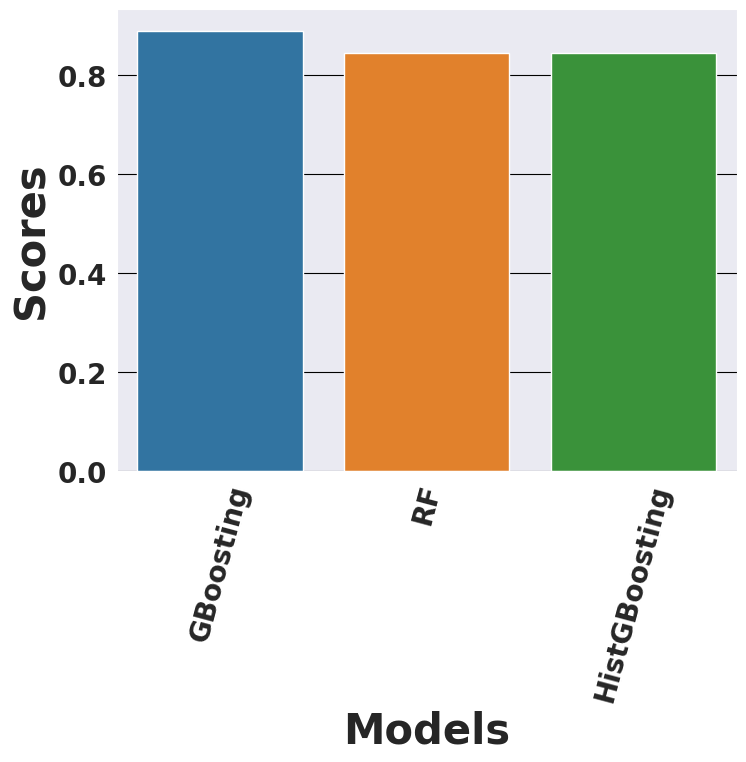

In [137]:
plot_model_comp(df_precision)

##Recall

In [213]:
plotly_plot(df_recall)

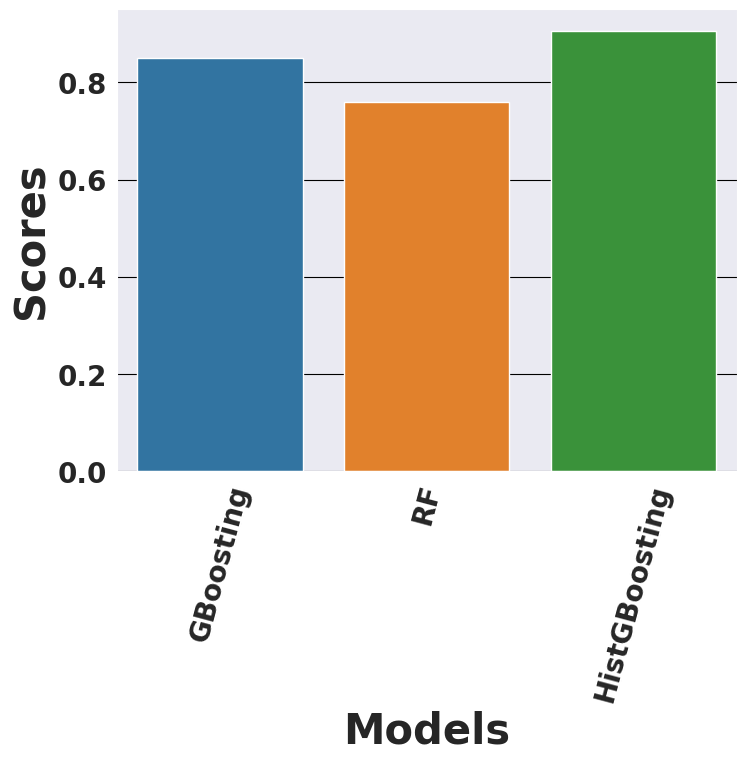

In [138]:
plot_model_comp(df_recall)

##f1_score

In [203]:
plotly_plot(df_f1_score)

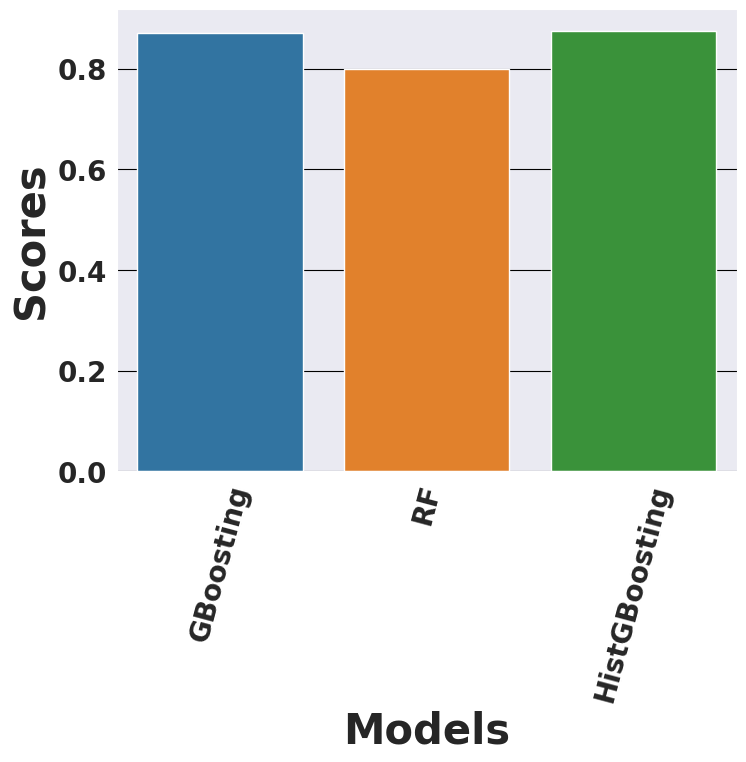

In [139]:
plot_model_comp(df_f1_score)

# **Voilin Plot_K-fold CV**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}


k=10
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  #l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k, scoring=scoring))
  #avg=sum(l)/k
  outcome = cross_validate(i[0],X_new.iloc[:,1:], y_new,cv=k, scoring=scoring)
  #print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print(i[0], outcome)
  print("--------------------------------------------------------------------------")

In [ ]:
vio_plot_key=models_check_box(models)

In [ ]:



k =10
mod_outcomes = []
for i in range(len(vio_plot_key)):
  if vio_plot_key[i].value ==True:
    mod_outcomes.append((str(models[i]).split('(')[0],cross_validate(models[i],X_new.iloc[:,1:], y_new,cv=k, scoring=scoring)))

mat_dic={
    'test_accuracy': "Accuracy",
    'test_precision':"Precision",
    'test_recall':"Recall",
    'test_f1_score':"F1-Score"
}



m = []
matrics = []
mat_score = []



for i in mod_outcomes:
  for j in i[1]:
    for l in i[1][j]:
      if j in mat_dic.keys():
        m.append(i[0])
        matrics.append(mat_dic[j])
        mat_score.append(l)


df={
    "Models" : m,
    "Matrics": matrics,
    "Scores":mat_score
}

df = pd.DataFrame.from_dict(df)




import seaborn as sns
import matplotlib.pyplot as plt
# Create a figure with a specific size
plt.figure(figsize=(20, 8))

my_pal = {"GradientBoostingClassifier": "cyan", "RandomForestClassifier": "coral", "HistGradientBoostingClassifier": "lime"}
ax = sns.violinplot(data=df, x="Matrics", y="Scores", hue="Models", palette=my_pal)
#ax = sns.violinplot(data=df, y="Performance Scores", hue="Models")

ax.set_xlabel("Matrics", fontdict={'size': 20, 'weight': 'bold'})
ax.set_ylabel("Performance Scores", fontdict={'size': 20, 'weight': 'bold'})
#ax.tick_params(axis='both', which='major', labelsize=14,fontweight='bold')


plt.yticks(fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')

plt.legend(title='Models',fontsize= 15, title_fontproperties={'weight':'bold'})


plt.show()




# **CV_ROC**

In [ ]:


def CV_ROC(model,folds,graph_feat):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc,roc_curve
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold


  cv = StratifiedKFold(n_splits=folds)



  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 5,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.title('CV-ROC-> '+str(model),fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  plt.legend(
           prop = {'size' : graph_feat["legend Font Size"]},
           loc = graph_feat["legend Position"])
  plt.xticks(fontsize=25, weight = 'bold')
  plt.yticks(fontsize=25, weight = 'bold')
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [ ]:
new_keys=models_check_box(models)

<font color="apple green">Just mark the above cell to select the Multiple Algorithms for ROC CV graph. <font color="sky blue"><b>Then run the cell below after selecting.</b></font> You do not need to run above cell everytime...</font><font color='red'><b>Do not run above cell after selecting</b></font>

In [ ]:
# run this cell after selecting

graph_feat={
    "Title Size":30,
    "Title Fontweight":'bold',

    "legend Font Size": 20,
    "legend Position": "lower right",

    "X axis Label Font Size":25,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":25,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}





k_fold=10

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],10,graph_feat)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

# **LIME**

In [ ]:
!pip install lime

In [ ]:

def LIME_EXP(model,row):
  import lime
  from lime import lime_tabular


  if str(model)[:3] == "XGB":

    '''
    explainer = lime.lime_tabular.LimeTabularExplainer(
      X_train.values,
      feature_names=list(list(X_new.columns)),
      class_names=['Reading', 'Resting', 'Walking', 'Working']
      )

    exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                model.predict_proba,
                                num_features=6,
                                top_labels=2)'''
    print("Plz RUN XGboost cell....")
    return None

  else:
    explainer = lime_tabular.LimeTabularExplainer(
      training_data=np.array(X_train),
      feature_names=list(X_new.columns),
      class_names=['Control', 'Stroke'],
      mode='classification'
      )

    exp = explainer.explain_instance(X_test.iloc[row],
                                    model.predict_proba,
                                    num_features=6,
                                    top_labels=4)



  #exp.show_in_notebook(show_table=True, show_all=True)
  exp.show_in_notebook(show_table=True)


  import matplotlib.pyplot as plt
  with plt.style.context("ggplot"):
      exp.as_pyplot_figure()


  from IPython.display import HTML
  html_data = exp.as_html()
  HTML(data=html_data)

  exp.save_to_file(str(model)+".html")

In [ ]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME

In [ ]:

new_keys_8=models_check_box(models)

In [ ]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    print(models[i])
    LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

### LIME for XGboost

In [ ]:
row = 18  ## the index of row to be explained in LIME

import lime
from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=list(list(X_new.columns)),
                                                   class_names=['Control', 'Stroke'])

####Default

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_deafult.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_deafult.html")

####Best Max Depth

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_depth.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_depth.html")

####Best N Estimator

In [ ]:


exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_estimator.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_estimator.html")

####Best Depth and Best Estimator

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_all.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)


import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_all.html")